## Data Mining Project  - Group 54

**Msc:** Data Science and Advanced Analytics

**Course:** Data Mining - 2023/2024

**Group Members and Student Numbers:** Mohamed Taha Ben Attia - 20230742 ; Jannik Himmelsbach - 20230550 ; Matilde Perreira - 20230439

___________________________________
<h1>1.Imports</h1>

___________________________________________
<h2> 1.1 Import the librairies </h2>

In [1]:
from math import ceil
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.base import clone
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram

____________________________________________
<h2> 1.2 Load the dataset </h2>

In [2]:
# Loading the dataset into a data frame 
df_original = pd.read_csv('XYZ_sports_dataset.csv', sep=';')

In [3]:
# reate a copy of the original dataset
df = df_original.copy()

_________________________________________
<h1> 2. Exploring the data </h1>

________________________________________
<h2>2.1 Data Overview</h2>

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

ID  Age  Gender  Income EnrollmentStart EnrollmentFinish  \
0  10000   60  Female  5500.0      2019-09-03       2019-10-31   
1  10001   29  Female  2630.0      2014-08-12       2015-09-14   
2  10002   23    Male  1980.0      2017-05-02       2017-06-01   
3  10003    9    Male     0.0      2018-09-05       2019-02-12   
4  10004   35    Male  4320.0      2016-04-20       2018-06-07   

  LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  \
0      2019-07-01       2019-12-31    2019-10-30                     1   
1      2015-01-01       2015-12-31    2015-07-16                    60   
2      2017-01-01       2017-06-30    2017-05-25                     7   
3      2018-07-01       2019-06-30    2019-01-21                    22   
4      2018-01-01       2018-06-30    2017-11-09                   210   

   LifetimeValue  UseByTime  AthleticsActivities  WaterActivities  \
0          89.35          0                  0.0              0.0   
1         479.20          0                  0.0              0.0   
2          37.60          0                  0.0              0.0   
3         155.40          0                  0.0              0.0   
4         373.20          0                  0.0              0.0   

   FitnessActivities  DanceActivities  TeamActivities  RacketActivities  \
0                1.0              0.0             0.0               0.0   
1                0.0              0.0             0.0               0.0   
2                1.0              0.0             0.0               0.0   
3                0.0              0.0             1.0               0.0   
4                1.0              0.0             0.0               0.0   

   CombatActivities  NatureActivities  SpecialActivities  OtherActivities  \
0               0.0               0.0                0.0              0.0   
1               0.0               0.0                1.0              0.0   
2               0.0               0.0                0.0              0.0   
3               0.0               0.0                0.0              0.0   
4               0.0               0.0                0.0              NaN   

   NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
0                  9.0                7                       NaN   
1                 23.0                1                       2.0   
2                  6.0                0                       7.0   
3                 20.0                2                       2.0   
4                 41.0                0                       7.0   

   AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
0                        6.28                   2                 0   
1                       17.42                   1                 2   
2                       30.03                   6                 0   
3                       17.72                   3                 0   
4                       60.97                   0                 3   

   HasReferences  NumberOfReferences  Dropout  
0            0.0                   0        0  
1            0.0                   0        1  
2            0.0                   0        1  
3            0.0                   0        1  
4            0.0                   0        1

In [6]:
print("This data set has",df.shape[1],"columns and", df.shape[0],"rows")

This data set has 31 columns and 14942 rows


In [7]:
df.ID.nunique()

14942

__________________________________________
<h2>2.2. Exploratory Data Analysis</h2>

In [8]:
#check the data types of the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14942 non-null  int64  
 1   Age                         14942 non-null  int64  
 2   Gender                      14942 non-null  object 
 3   Income                      14447 non-null  float64
 4   EnrollmentStart             14942 non-null  object 
 5   EnrollmentFinish            14942 non-null  object 
 6   LastPeriodStart             14942 non-null  object 
 7   LastPeriodFinish            14942 non-null  object 
 8   DateLastVisit               14942 non-null  object 
 9   DaysWithoutFrequency        14942 non-null  int64  
 10  LifetimeValue               14942 non-null  float64
 11  UseByTime                   14942 non-null  int64  
 12  AthleticsActivities         14906 non-null  float64
 13  WaterActivities             149

In [9]:
# Descriptive Statistics for numerical variables
df.describe(include='all').T

count unique         top  freq         mean  \
ID                          14942.0    NaN         NaN   NaN      17470.5   
Age                         14942.0    NaN         NaN   NaN    26.015794   
Gender                        14942      2      Female  8931          NaN   
Income                      14447.0    NaN         NaN   NaN  2230.816086   
EnrollmentStart               14942   1490  2015-03-02    92          NaN   
EnrollmentFinish              14942   1300  2015-09-16  1684          NaN   
LastPeriodStart               14942     12  2019-07-01  3172          NaN   
LastPeriodFinish              14942     11  2019-12-31  3694          NaN   
DateLastVisit                 14942   1384  2019-10-31   475          NaN   
DaysWithoutFrequency        14942.0    NaN         NaN   NaN    81.224936   
LifetimeValue               14942.0    NaN         NaN   NaN   302.561871   
UseByTime                   14942.0    NaN         NaN   NaN     0.047116   
AthleticsActivities         14906.0    NaN         NaN   NaN      0.00738   
WaterActivities             14905.0    NaN         NaN   NaN     0.296209   
FitnessActivities           14907.0    NaN         NaN   NaN     0.576038   
DanceActivities             14906.0    NaN         NaN   NaN          0.0   
TeamActivities              14907.0    NaN         NaN   NaN     0.055544   
RacketActivities            14905.0    NaN         NaN   NaN     0.023415   
CombatActivities            14909.0    NaN         NaN   NaN     0.107921   
NatureActivities            14895.0    NaN         NaN   NaN          0.0   
SpecialActivities           14898.0    NaN         NaN   NaN     0.026514   
OtherActivities             14907.0    NaN         NaN   NaN     0.001878   
NumberOfFrequencies         14916.0    NaN         NaN   NaN    40.120542   
AttendedClasses             14942.0    NaN         NaN   NaN    10.152456   
AllowedWeeklyVisitsBySLA    14407.0    NaN         NaN   NaN     5.759561   
AllowedNumberOfVisitsBySLA  14942.0    NaN         NaN   NaN    41.636299   
RealNumberOfVisits          14942.0    NaN         NaN   NaN     5.320707   
NumberOfRenewals            14942.0    NaN         NaN   NaN      1.20526   
HasReferences               14930.0    NaN         NaN   NaN     0.019893   
NumberOfReferences          14942.0    NaN         NaN   NaN     0.022286   
Dropout                     14942.0    NaN         NaN   NaN     0.800964   

                                    std      min       25%      50%       75%  \
ID                          4313.528196  10000.0  13735.25  17470.5  21205.75   
Age                           14.156582      0.0      19.0     23.0      31.0   
Gender                              NaN      NaN       NaN      NaN       NaN   
Income                      1566.527734      0.0    1470.0   1990.0    2790.0   
EnrollmentStart                     NaN      NaN       NaN      NaN       NaN   
EnrollmentFinish                    NaN      NaN       NaN      NaN       NaN   
LastPeriodStart                     NaN      NaN       NaN      NaN       NaN   
LastPeriodFinish                    NaN      NaN       NaN      NaN       NaN   
DateLastVisit                       NaN      NaN       NaN      NaN       NaN   
DaysWithoutFrequency         144.199576      0.0      13.0     41.0     83.75   
LifetimeValue                364.319566      0.0      83.6    166.2   355.075   
UseByTime                      0.211893      0.0       0.0      0.0       0.0   
AthleticsActivities             0.08559      0.0       0.0      0.0       0.0   
WaterActivities                  0.4566      0.0       0.0      0.0       1.0   
FitnessActivities              0.494201      0.0       0.0      1.0       1.0   
DanceActivities                     0.0      0.0       0.0      0.0       0.0   
TeamActivities                 0.229047      0.0       0.0      0.0       0.0   
RacketActivities               0.151222      0.0       0.0      0.0       0.0   
CombatActivities          

In [10]:
# Descriptive Statistics for categorical variables
df.describe(include="object").T

count unique         top  freq
Gender            14942      2      Female  8931
EnrollmentStart   14942   1490  2015-03-02    92
EnrollmentFinish  14942   1300  2015-09-16  1684
LastPeriodStart   14942     12  2019-07-01  3172
LastPeriodFinish  14942     11  2019-12-31  3694
DateLastVisit     14942   1384  2019-10-31   475

_______________________________________________
<h1>3. Data Preprocessing </h1>

In [11]:
# Change the index of the dataset 
df.set_index('ID', inplace=True)

In [12]:
#Drop the HasReferences column since the column NumberOfReferences can show us if a person HasReferences or not 
df.drop("HasReferences", axis=1, inplace=True)


____________________________________________
<h2>3.1 Duplicates</h2>

In [13]:
# check the number of duplicates in our dataset
df.duplicated().sum()

1

In [14]:
df[df.duplicated() == True]

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
22873   12  Female     0.0      2019-06-18       2019-09-10      2019-07-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
22873       2019-12-31    2019-07-31                    41          73.35   

       UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                                          
22873          0                  0.0              1.0                0.0   

       DanceActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                           
22873              0.0             0.0               0.0               0.0   

       NatureActivities  SpecialActivities  OtherActivities  \
ID                                                            
22873               0.0                0.0              0.0   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                                                                      
22873                 14.0                7                       5.0   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
22873                        44.3                  10                 1   

       NumberOfReferences  Dropout  
ID                                  
22873                   0        1

In [15]:
# drop the duplicates from our data set
df.drop_duplicates(inplace=True)

__________________________________________
<h2>3.2 Date Features </h2>

In [16]:
# Make sure all date columns are in date format
df['EnrollmentStart'] = pd.to_datetime(df['EnrollmentStart'])
df['EnrollmentFinish'] = pd.to_datetime(df['EnrollmentFinish'])
df['LastPeriodStart'] = pd.to_datetime(df['LastPeriodStart'])
df['LastPeriodFinish'] = pd.to_datetime(df['LastPeriodFinish'])
df['DateLastVisit'] = pd.to_datetime(df['DateLastVisit'])

In [17]:
cols_to_check = ['EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit', 'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime', 'Dropout']

In [18]:
df[cols_to_check].head()

EnrollmentStart EnrollmentFinish LastPeriodStart LastPeriodFinish  \
ID                                                                        
10000      2019-09-03       2019-10-31      2019-07-01       2019-12-31   
10001      2014-08-12       2015-09-14      2015-01-01       2015-12-31   
10002      2017-05-02       2017-06-01      2017-01-01       2017-06-30   
10003      2018-09-05       2019-02-12      2018-07-01       2019-06-30   
10004      2016-04-20       2018-06-07      2018-01-01       2018-06-30   

      DateLastVisit  DaysWithoutFrequency  LifetimeValue  UseByTime  Dropout  
ID                                                                            
10000    2019-10-30                     1          89.35          0        0  
10001    2015-07-16                    60         479.20          0        1  
10002    2017-05-25                     7          37.60          0        1  
10003    2019-01-21                    22         155.40          0        1  
10004    2017-11-09                   210         373.20          0        1

<h3>3.2.1 Enrollment Dates </h3>

In [19]:
# check if EnrollmentStart is bigger than EnrollmentFinish 
df[df["EnrollmentStart"] > df["EnrollmentFinish"]]

Empty DataFrame
Columns: [Age, Gender, Income, EnrollmentStart, EnrollmentFinish, LastPeriodStart, LastPeriodFinish, DateLastVisit, DaysWithoutFrequency, LifetimeValue, UseByTime, AthleticsActivities, WaterActivities, FitnessActivities, DanceActivities, TeamActivities, RacketActivities, CombatActivities, NatureActivities, SpecialActivities, OtherActivities, NumberOfFrequencies, AttendedClasses, AllowedWeeklyVisitsBySLA, AllowedNumberOfVisitsBySLA, RealNumberOfVisits, NumberOfRenewals, NumberOfReferences, Dropout]
Index: []

In [20]:
# check if EnrollmentStart is equal than EnrollmentFinish 
df[(df["EnrollmentStart"] == df["EnrollmentFinish"]) & (df["EnrollmentStart"] != df["DateLastVisit"])].head()

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
10025   13  Female     0.0      2015-09-09       2015-09-09      2019-07-01   
10036   13  Female     0.0      2014-10-02       2014-10-02      2019-07-01   
10038   38  Female  1910.0      2018-09-29       2018-09-29      2019-07-01   
10049   56    Male  6540.0      2018-09-03       2018-09-03      2019-07-01   
10051   12  Female     0.0      2018-08-17       2018-08-17      2019-07-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
10025       2019-12-31    2019-10-26                     5         596.30   
10036       2019-12-31    2019-10-22                     9        2209.97   
10038       2019-12-31    2019-10-30                     1         554.60   
10049       2019-12-31    2019-10-29                     2         540.10   
10051       2019-12-31    2019-10-28                     3         852.30   

       UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                                          
10025          0                  0.0              1.0                0.0   
10036          0                  0.0              1.0                0.0   
10038          0                  0.0              1.0                0.0   
10049          0                  0.0              1.0                0.0   
10051          0                  0.0              1.0                0.0   

       DanceActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                           
10025              0.0             0.0               0.0               0.0   
10036              0.0             1.0               0.0               1.0   
10038              0.0             0.0               0.0               0.0   
10049              0.0             0.0               0.0               0.0   
10051              0.0             1.0               0.0               0.0   

       NatureActivities  SpecialActivities  OtherActivities  \
ID                                                            
10025               0.0                0.0              0.0   
10036               0.0                0.0              0.0   
10038               0.0                0.0              0.0   
10049               0.0                0.0              0.0   
10051               0.0                0.0              0.0   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                                                                      
10025                 27.0               18                       2.0   
10036                199.0              166                       2.0   
10038                127.0              125                       3.0   
10049                112.0                0                       7.0   
10051                 42.0               42                       4.0   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
10025                        6.28                   3                 4   
10036                       17.14                   5                 5   
10038                       26.13                  25                 1   
10049                       60.97                  32                 1   
10051                       34.84                   4                 2   

       NumberOfReferences  Dropout  
ID                                  
10025                   0        0  
10036                   1        0  
10038                   0        0  
10049                   0        0  
10051                   0        0

In [21]:
# Correct the previous incoherence, using the pattern that EnrollmentFinish = DateLastVisit + DaysWithoutFrequency

# Update 'EnrollmentFinish' based on pattern info
df.loc[df["EnrollmentStart"] == df["EnrollmentFinish"], "EnrollmentFinish"] = df['DateLastVisit'] + pd.to_timedelta(df['DaysWithoutFrequency'], unit='D')

In [22]:
# check results 
df[(df["EnrollmentStart"] == df["EnrollmentFinish"]) & (df["EnrollmentStart"] != df["DateLastVisit"])].head()

Empty DataFrame
Columns: [Age, Gender, Income, EnrollmentStart, EnrollmentFinish, LastPeriodStart, LastPeriodFinish, DateLastVisit, DaysWithoutFrequency, LifetimeValue, UseByTime, AthleticsActivities, WaterActivities, FitnessActivities, DanceActivities, TeamActivities, RacketActivities, CombatActivities, NatureActivities, SpecialActivities, OtherActivities, NumberOfFrequencies, AttendedClasses, AllowedWeeklyVisitsBySLA, AllowedNumberOfVisitsBySLA, RealNumberOfVisits, NumberOfRenewals, NumberOfReferences, Dropout]
Index: []

#### Create new feature EnrollmentDuration

In [23]:
# Calculate the duration of enrollment in days
df['EnrollmentDuration'] = (df['EnrollmentFinish'] - df['EnrollmentStart']).dt.days

##### Drop EnrollmentStart, EnrollmentFinish

In [24]:
df.drop("EnrollmentStart", axis=1, inplace=True)
df.drop("EnrollmentFinish", axis=1, inplace=True)

<h3> 3.2.2 LastPeriod Dates </h3>

In [25]:
df[['LastPeriodStart', 'LastPeriodFinish']].value_counts().sort_index()

LastPeriodStart  LastPeriodFinish
2014-01-01       2014-12-31             5
2014-07-01       2014-12-31           296
                 2015-06-30           136
2015-01-01       2015-06-30           881
                 2015-12-31           566
                 2016-06-30            57
2015-07-01       2015-12-31           287
                 2016-06-30           387
2016-01-01       2016-06-30           753
                 2016-12-31          1166
2016-07-01       2016-12-31           556
                 2017-06-30           171
2017-01-01       2017-06-30           820
                 2017-12-31           628
2017-07-01       2017-12-31           303
                 2018-06-30           316
2018-01-01       2018-06-30           671
                 2018-12-31          1199
2018-07-01       2018-12-31           549
                 2019-06-30           289
2019-01-01       2019-06-30          1212
                 2019-12-31           522
2019-07-01       2019-12-31          3171


#### Approach 1: Count Amount of Periods (1 period = 6 months)

In [26]:
# Looks like a period has six month, we will combine this info to create a new feature num_periods
df['num_periods'] = df['LastPeriodFinish'] - df['LastPeriodStart']

In [27]:
df[['num_periods', 'LastPeriodFinish', 'LastPeriodStart']].head()

num_periods LastPeriodFinish LastPeriodStart
ID                                                
10000    183 days       2019-12-31      2019-07-01
10001    364 days       2015-12-31      2015-01-01
10002    180 days       2017-06-30      2017-01-01
10003    364 days       2019-06-30      2018-07-01
10004    180 days       2018-06-30      2018-01-01

In [28]:
df.num_periods.value_counts().sort_index()

num_periods
180 days    3584
181 days     753
183 days    5162
364 days    3832
365 days    1553
546 days      57
Name: count, dtype: int64

In [29]:
# transform to amount of periods
df.num_periods = df.num_periods.apply(lambda x: 1 if x.days < 185 else 2 if x.days < 370 else 3)

In [30]:
# check results
df.num_periods.value_counts().sort_index()

num_periods
1    9499
2    5385
3      57
Name: count, dtype: int64

#### Approach 2: Check if Winter Period or Summer Period or Both

In [31]:
# Function to create new column period_type
def create_period_type(row):
    if row['LastPeriodStart'].month == 1 and row['num_periods'] == 1:
        return 0
    elif row['LastPeriodStart'].month == 7 and row['num_periods'] == 1:
        return 1
    else:
        return 2

In [32]:
# If period starts in winter (january) and num_periods = 1 -> period_type = 0
# If period starts in summer (july) and num_periods = 1 -> period_type = 1
# Else periods cover the full year -> period_type = 2

df['period_type'] = df.apply(create_period_type, axis=1)

In [33]:
df.period_type.value_counts().sort_index()

period_type
0    4337
1    5162
2    5442
Name: count, dtype: int64

##### Remove LastPeriodStart, LastPeriodFinish columns

In [34]:
df.drop(['LastPeriodStart', 'LastPeriodFinish'], axis=1, inplace=True)

<h3>3.2.3 DateLastVisit </h3>

In [35]:
# create a column called DaysSinceLastVisit by Calculating  October 31st 2019 minus DateLastVisit and then drop the column DateLastVisit

reference_date = pd.to_datetime("2019-10-31")

# Calculate the duration of DaysSinceLastVisit
df["DaysSinceLastVisit"] = (reference_date - df["DateLastVisit"]).dt.days

##### Remove DateLastVisit column

In [36]:
df.drop("DateLastVisit", axis=1, inplace=True)

________________________________________________
<h2>3.3 Addtional Coherence Checks </h2>

#### 1. Income with Age < 15 years
According to european law it is generally not allowed for children below 15 years to work.

Source: https://europa.eu/youreurope/business/human-resources/employment-contracts/teenage-workers/index_en.htm#:~:text=You%20cannot%20employ%20young,continues%20after%20age%2015.&text=You%20cannot,age%2015.&text=employ%20young,continues%20after

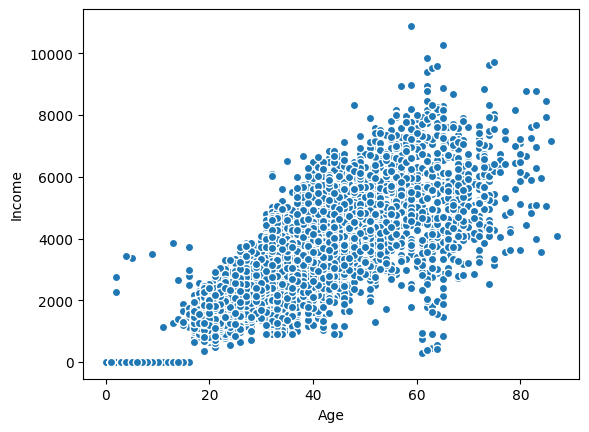

In [37]:
# Single Metric Variable Scatter plot
plt.scatter(df["Age"], df["Income"], edgecolors="white")
plt.xlabel("Age")
plt.ylabel("Income")

plt.show()

In [38]:
# Aparently there are toddlers earning thousands of euros, we will remove them
df[(df.Age < 15) & (df.Income > 0)][['Age', 'Income']]

Age  Income
ID                
11722   13  1260.0
13013   11  1120.0
13889    5  3400.0
14128   14  2640.0
15279    9  3490.0
17542   13  3870.0
18805    5  3380.0
19346   14  1390.0
21012    2  2260.0
24359    4  3430.0
24830    2  2750.0

In [39]:
df.drop(df[(df.Age < 15) & (df.Income > 0)].index, inplace=True)

#### 2. Toddlers doing Fitness (other activities than water activities)

In [40]:
# check the values for certain columns
columns_to_check=["UseByTime", "AthleticsActivities", "WaterActivities", "FitnessActivities","DanceActivities", "TeamActivities", "RacketActivities", "CombatActivities", "NatureActivities", "SpecialActivities", "OtherActivities"]
for column in columns_to_check : 
  print("The unique values for the column",column,"are :" ,df[column].unique())

The unique values for the column UseByTime are : [0 1]
The unique values for the column AthleticsActivities are : [ 0.  1. nan]
The unique values for the column WaterActivities are : [ 0.  1. nan]
The unique values for the column FitnessActivities are : [ 1.  0. nan]
The unique values for the column DanceActivities are : [ 0. nan]
The unique values for the column TeamActivities are : [ 0.  1. nan]
The unique values for the column RacketActivities are : [ 0.  1. nan]
The unique values for the column CombatActivities are : [ 0.  1. nan]
The unique values for the column NatureActivities are : [ 0. nan]
The unique values for the column SpecialActivities are : [ 0.  1. nan]
The unique values for the column OtherActivities are : [ 0. nan  1.]


In [41]:
df[df.Age < 4][columns_to_check].value_counts()

UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  DanceActivities  TeamActivities  RacketActivities  CombatActivities  NatureActivities  SpecialActivities  OtherActivities
0          0.0                  1.0              0.0                0.0              0.0             0.0               0.0               0.0               0.0                0.0                555
                                0.0              1.0                0.0              0.0             0.0               0.0               0.0               0.0                0.0                  3
                                                 0.0                0.0              0.0             0.0               1.0               0.0               0.0                0.0                  1
Name: count, dtype: int64

In [42]:
# Drop rows where 'Age' is less than 4 and 'WaterActivities' is not equal to 1 (people under 4 years old are only allowed to have WaterActivities)
df.drop(df[(df['Age'] < 4) & (df['WaterActivities'] != 1)].index, inplace=True)

In [43]:
# Drop rows where 'Age' is less than 12 and 'FitnessActivities' is equal to 1 (people under 12 years old are not allowed to do Fitness)
df.drop(df[(df['Age'] < 12) & (df['FitnessActivities'] == 1)].index, inplace=True)

#### 3. RealNumberOfVisits is bigger than AllowedNumberOfVisitsBySLA 

In [44]:
# check if RealNumberOfVisits is bigger than AllowedNumberOfVisitsBySLA without having UseByTime == 1
print(df[(df["RealNumberOfVisits"] > df["AllowedNumberOfVisitsBySLA"]) & (df["UseByTime"] == 0)][["RealNumberOfVisits", "AllowedNumberOfVisitsBySLA"]].shape)
df[(df["RealNumberOfVisits"] > df["AllowedNumberOfVisitsBySLA"]) & (df["UseByTime"] == 0)][["RealNumberOfVisits", "AllowedNumberOfVisitsBySLA"]].head()

(45, 2)


RealNumberOfVisits  AllowedNumberOfVisitsBySLA
ID                                                   
10271                  10                        6.86
10409                  49                       19.29
10481                  26                       17.42
10672                  11                        8.58
11034                   8                        6.28

In [45]:
df.drop(df[(df["RealNumberOfVisits"] > df["AllowedNumberOfVisitsBySLA"]) & (df["UseByTime"] == 0)].index, inplace=True)

#### 4. AllowedNumberOfVisitsBySLA < 1

In [46]:
df[df.AllowedNumberOfVisitsBySLA < 1].AllowedNumberOfVisitsBySLA

ID
11678    0.56
15079    0.86
17365    0.71
19842    0.71
23090    0.71
23296    0.71
23554    0.56
Name: AllowedNumberOfVisitsBySLA, dtype: float64

In [47]:
df = df[df.AllowedNumberOfVisitsBySLA >= 1]

#### 5. Lifetimevalue = 0

In [48]:
df[df.LifetimeValue < 1].LifetimeValue

ID
15746    0.0
19016    0.0
19639    0.0
Name: LifetimeValue, dtype: float64

In [49]:
df = df[df.LifetimeValue > 0]

_______________________________________________________
<h2>3.4 Defining metric and non_metric features</h2>

In [50]:
df.columns

Index(['Age', 'Gender', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
       'UseByTime', 'AthleticsActivities', 'WaterActivities',
       'FitnessActivities', 'DanceActivities', 'TeamActivities',
       'RacketActivities', 'CombatActivities', 'NatureActivities',
       'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
       'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'NumberOfReferences', 'Dropout', 'EnrollmentDuration', 'num_periods',
       'period_type', 'DaysSinceLastVisit'],
      dtype='object')

In [51]:
metric_features = ["Age", "Income", "DaysWithoutFrequency", "LifetimeValue", "NumberOfFrequencies",
                   "AttendedClasses", "AllowedWeeklyVisitsBySLA", "AllowedNumberOfVisitsBySLA", "RealNumberOfVisits",
                   "NumberOfRenewals", "NumberOfReferences", 'num_periods', 'EnrollmentDuration', 'DaysSinceLastVisit']

non_metric_features = df.columns.drop(metric_features).tolist()

In [52]:
len(df.columns), len(metric_features), len(non_metric_features)

(28, 14, 14)

In [53]:
pd.to_numeric(df['Income'], errors='coerce').notnull().all()

False

_______________________________________________
<h2>3.5 Treating Missing </h2>

In [54]:
# Check all missing values
missing_values = df.isna().sum()

# Calculate the percentage of missing values
percentage_missing = (missing_values / df.shape[0]) * 100

# Combine the results into a new DataFrame for better readability
missing_data_summary = pd.DataFrame({
    'Variable': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage Missing': percentage_missing.values
})

# Display the summary
print(missing_data_summary)

                      Variable  Missing Values  Percentage Missing
0                          Age               0            0.000000
1                       Gender               0            0.000000
2                       Income             488            3.282217
3         DaysWithoutFrequency               0            0.000000
4                LifetimeValue               0            0.000000
5                    UseByTime               0            0.000000
6          AthleticsActivities              35            0.235405
7              WaterActivities              36            0.242131
8            FitnessActivities              33            0.221953
9              DanceActivities              36            0.242131
10              TeamActivities              35            0.235405
11            RacketActivities              37            0.248857
12            CombatActivities              33            0.221953
13            NatureActivities              46            0.30

___________________________________
<h3>3.5.1 Metric features </h3>

In [55]:
# These are the number of missing values of the metric features
df[metric_features].isna().sum()

Age                             0
Income                        488
DaysWithoutFrequency            0
LifetimeValue                   0
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      528
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
NumberOfReferences              0
num_periods                     0
EnrollmentDuration              0
DaysSinceLastVisit              0
dtype: int64

<h4> 1. Income </h4>
__________________________________________________________

In [56]:
# check Correlation between Income and Age
print("Correlation : ", df['Income'].corr(df['Age']))

Correlation :  0.8761137085017002


In [57]:
# Create a new column 'AgeCategory' for  Income inputation
bins = [0, 3, 12, 19, 30, 50, 100]
labels = ['Toddler', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['AgeCategory'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

#Add AgeCategory to non metric features
non_metric_features.append("AgeCategory")

In [58]:
df.Income.value_counts(dropna=False)

Income
0.0        2105
NaN         488
1890.0       84
1820.0       82
1970.0       80
           ... 
10890.0       1
7640.0        1
8160.0        1
6510.0        1
6570.0        1
Name: count, Length: 736, dtype: int64

In [59]:
#Fill the missing values of income by the mean of income of each age category
df['Income'] = df.groupby('AgeCategory')['Income'].transform(lambda x: x.fillna(x.mean()))

C:\Users\Jannik\AppData\Local\Temp\ipykernel_30696\3066627948.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Income'] = df.groupby('AgeCategory')['Income'].transform(lambda x: x.fillna(x.mean()))


<h4> 2. AllowedWeeklyVisitsBySLA  </h4>
__________________________________________________________

In [60]:
df.AllowedWeeklyVisitsBySLA.value_counts(dropna=False)

AllowedWeeklyVisitsBySLA
7.0    10488
2.0     2320
4.0      736
NaN      528
1.0      505
3.0      158
6.0      118
5.0       15
Name: count, dtype: int64

In [61]:
df[df.AllowedWeeklyVisitsBySLA.isna() == True].head()

Age  Gender  Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
ID                                                                           
10000   60  Female  5500.0                     1          89.35          0   
10019   28    Male  2510.0                    10          52.00          0   
10034   74  Female  5210.0                    20          38.50          0   
10107   19  Female  1690.0                    16          48.00          0   
10109   29  Female  2730.0                     2          96.20          0   

       AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                               
10000                  0.0              0.0                1.0   
10019                  0.0              0.0                1.0   
10034                  0.0              0.0                1.0   
10107                  0.0              0.0                1.0   
10109                  0.0              0.0                1.0   

       DanceActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                           
10000              0.0             0.0               0.0               0.0   
10019              0.0             0.0               0.0               1.0   
10034              0.0             0.0               0.0               0.0   
10107              0.0             0.0               0.0               0.0   
10109              0.0             0.0               0.0               0.0   

       NatureActivities  SpecialActivities  OtherActivities  \
ID                                                            
10000               0.0                0.0              0.0   
10019               0.0                0.0              0.0   
10034               0.0                0.0              0.0   
10107               0.0                0.0              0.0   
10109               0.0                0.0              0.0   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                                                                      
10000                  9.0                7                       NaN   
10019                  2.0                0                       NaN   
10034                  4.0                0                       NaN   
10107                  2.0                0                       NaN   
10109                 13.0                0                       NaN   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
10000                        6.28                   2                 0   
10019                       24.01                   2                 0   
10034                       30.03                   4                 0   
10107                       28.98                   2                 0   
10109                       48.02                  13                 0   

       NumberOfReferences  Dropout  EnrollmentDuration  num_periods  \
ID                                                                    
10000                   0        0                  58            1   
10019                   0        0                  30            1   
10034                   0        0                  30            1   
10107                   0        0                  29            1   
10109                   0        0                  48            1   

       period_type  DaysSinceLastVisit  AgeCategory  
ID                                                   
10000            1                   1       Senior  
10019            1                  10  Young Adult  
10034            1                  20       Senior  
10107            1                  16  Young Adult  
10109            1                   2  Young Adult

In [62]:
# check Correlation between AllowedWeeklyVisitsBySLA and AllowedNumberOfVisitsBySLA 
print("Correlation : ", df['AllowedWeeklyVisitsBySLA'].corr(df['AllowedNumberOfVisitsBySLA']))

Correlation :  0.6723014115244954


In [63]:
# Since Correlation between AllowedWeeklyVisitsBySLA and AllowedNumberOfVisitsBySLA is kind of high we are going to consider knn 
# to replace missing values 

# Prepare data for kNN imputation
imputation_data = df[['AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA']]

# Identify rows with missing values
missing_rows = imputation_data['AllowedWeeklyVisitsBySLA'].isnull()

# Check if there are missing values before performing imputation
if missing_rows.any():
    # Initialize kNN imputer
    imputer = KNNImputer(n_neighbors=7)  # You can adjust the number of neighbors as needed

    # Perform imputation only for rows with missing values
    imputed_data = imputer.fit_transform(imputation_data)

    # Update the original DataFrame with imputed values
    df.loc[missing_rows, 'AllowedWeeklyVisitsBySLA'] = imputed_data[missing_rows, 0]

    # Round imputed floats to integer
    df.AllowedWeeklyVisitsBySLA = df.AllowedWeeklyVisitsBySLA.round()

In [64]:
df.AllowedWeeklyVisitsBySLA.value_counts(dropna=False)

AllowedWeeklyVisitsBySLA
7.0    10864
2.0     2398
4.0      752
1.0      515
3.0      193
6.0      127
5.0       19
Name: count, dtype: int64

<h4> 3. NumberOfFrequencies </h4>
__________________________________________________________

In [65]:
df.NumberOfFrequencies.value_counts(dropna=False)

NumberOfFrequencies
2.0      660
3.0      620
1.0      606
4.0      583
5.0      556
        ... 
384.0      1
255.0      1
233.0      1
341.0      1
472.0      1
Name: count, Length: 414, dtype: int64

In [66]:
df.NumberOfFrequencies.isnull().sum()

26

Approach drop instead of inpute
______________________________

In [67]:
df.dropna(axis=0, subset=['NumberOfFrequencies'], inplace=True)

In [68]:
df.NumberOfFrequencies.isnull().sum()

0

__________________________

In [71]:
df[metric_features].isna().sum()

Age                           0
Income                        0
DaysWithoutFrequency          0
LifetimeValue                 0
NumberOfFrequencies           0
AttendedClasses               0
AllowedWeeklyVisitsBySLA      0
AllowedNumberOfVisitsBySLA    0
RealNumberOfVisits            0
NumberOfRenewals              0
NumberOfReferences            0
num_periods                   0
EnrollmentDuration            0
DaysSinceLastVisit            0
dtype: int64

______________________________
<h3>3.5.2 Non Metric features (Categorical) </h3>

In [72]:
df[non_metric_features].isnull().sum()

Gender                  0
UseByTime               0
AthleticsActivities    35
WaterActivities        36
FitnessActivities      33
DanceActivities        36
TeamActivities         35
RacketActivities       37
CombatActivities       33
NatureActivities       46
SpecialActivities      44
OtherActivities        35
Dropout                 0
period_type             0
AgeCategory             0
dtype: int64

<h4> 1. Activities</h4>
________________________________________________________

'AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'DanceActivities', 'TeamActivities',
'RacketActivities', 'CombatActivities', 'NatureActivities', 'SpecialActivities','OtherActivities'

In [73]:
# Fill missing values with 1 in the specified columns if all other corresponding columns have 0

columns_of_interest = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities',
                         'DanceActivities', 'TeamActivities', 'RacketActivities',
                         'CombatActivities', 'NatureActivities', 'SpecialActivities',
                         'OtherActivities']

# Create a boolean mask for rows with missing values in any of the specified columns
mask_missing_values = df[columns_of_interest].isnull().any(axis=1)

# Create a boolean mask for rows where the rest of the values are zeros
mask_zeros = (df[columns_of_interest].fillna(0) == 0).all(axis=1)

# Combine the masks to find rows with missing values and the rest being zeros
rows_with_missing_and_zeros = df[mask_missing_values & mask_zeros]

# Replace missing values with 1 in the specified columns for the identified rows
df.loc[mask_missing_values & mask_zeros, columns_of_interest] = df.loc[mask_missing_values & mask_zeros, columns_of_interest].fillna(1)

In [74]:
#Filling the rest of the missing values of these columns with the mode

df[['AthleticsActivities', 'WaterActivities', 'FitnessActivities',
    'DanceActivities', 'TeamActivities', 'RacketActivities',
    'CombatActivities', 'NatureActivities', 'SpecialActivities',
    'OtherActivities']] = df[
    ['AthleticsActivities', 'WaterActivities', 'FitnessActivities',
     'DanceActivities', 'TeamActivities', 'RacketActivities',
     'CombatActivities', 'NatureActivities', 'SpecialActivities',
     'OtherActivities']
].apply(lambda x: x.fillna(x.mode().iloc[0]))

# Print the final DataFrame with imputed values
df.head()

Age  Gender  Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
ID                                                                           
10000   60  Female  5500.0                     1          89.35          0   
10001   29  Female  2630.0                    60         479.20          0   
10002   23    Male  1980.0                     7          37.60          0   
10003    9    Male     0.0                    22         155.40          0   
10004   35    Male  4320.0                   210         373.20          0   

       AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                               
10000                  0.0              0.0                1.0   
10001                  0.0              0.0                0.0   
10002                  0.0              0.0                1.0   
10003                  0.0              0.0                0.0   
10004                  0.0              0.0                1.0   

       DanceActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                           
10000              0.0             0.0               0.0               0.0   
10001              0.0             0.0               0.0               0.0   
10002              0.0             0.0               0.0               0.0   
10003              0.0             1.0               0.0               0.0   
10004              0.0             0.0               0.0               0.0   

       NatureActivities  SpecialActivities  OtherActivities  \
ID                                                            
10000               0.0                0.0              0.0   
10001               0.0                1.0              0.0   
10002               0.0                0.0              0.0   
10003               0.0                0.0              0.0   
10004               0.0                0.0              0.0   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                                                                      
10000                  9.0                7                       2.0   
10001                 23.0                1                       2.0   
10002                  6.0                0                       7.0   
10003                 20.0                2                       2.0   
10004                 41.0                0                       7.0   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
10000                        6.28                   2                 0   
10001                       17.42                   1                 2   
10002                       30.03                   6                 0   
10003                       17.72                   3                 0   
10004                       60.97                   0                 3   

       NumberOfReferences  Dropout  EnrollmentDuration  num_periods  \
ID                                                                    
10000                   0        0                  58            1   
10001                   0        1                 398            2   
10002                   0        1                  30            1   
10003                   0        1                 160            2   
10004                   0        1                 778            1   

       period_type  DaysSinceLastVisit  AgeCategory  
ID                                                   
10000            1                   1       Senior  
10001            2                1568  Young Adult  
10002            0                 889  Young Adult  
10003            2                 283        Child  
10004            0                 721        Adult

In [75]:
df[non_metric_features].isnull().sum()

Gender                 0
UseByTime              0
AthleticsActivities    0
WaterActivities        0
FitnessActivities      0
DanceActivities        0
TeamActivities         0
RacketActivities       0
CombatActivities       0
NatureActivities       0
SpecialActivities      0
OtherActivities        0
Dropout                0
period_type            0
AgeCategory            0
dtype: int64

_______________________________________________
<h2>3.6 Check Numeric Values </h2>

In [76]:
for feature in metric_features:
    print(f"{feature}: is full numeric: {pd.to_numeric(df[feature], errors='coerce').notnull().all()}")

Age: is full numeric: True
Income: is full numeric: True
DaysWithoutFrequency: is full numeric: True
LifetimeValue: is full numeric: True
NumberOfFrequencies: is full numeric: True
AttendedClasses: is full numeric: True
AllowedWeeklyVisitsBySLA: is full numeric: True
AllowedNumberOfVisitsBySLA: is full numeric: True
RealNumberOfVisits: is full numeric: True
NumberOfRenewals: is full numeric: True
NumberOfReferences: is full numeric: True
num_periods: is full numeric: True
EnrollmentDuration: is full numeric: True
DaysSinceLastVisit: is full numeric: True


____________________________________
<h3>3.7 Data Visualization after Preprocessing </h3>

____________________________________
<h4>3.7.1 Metric Features </h4>

In [77]:
# Plotting Histogram and Boxplot for numerical features.

def visualize_numerical(data):
    
    ''' Visualizes the numerical features with a boxplot and histogram.

    # Arguments:
    dataset, pd DataFrame: input dataframe
    target, pd Series: target variable for hue colouring

    # Results:
    Shows the boxplot and histogram.
    
    '''
    
    figure, axis = plt.subplots(1, 2, figsize=(10, 3))
  
    sns.boxplot(ax= axis[0], x=data, dodge=False)
    axis[0].set_title(f"Boxplot of {data.name}", fontdict= {"fontsize": 14})
    
    sns.histplot(ax= axis[1], x=data, kde=False)
    axis[1].set_title(f"Histogram of {data.name}", fontdict= {"fontsize": 14})

    plt.show()

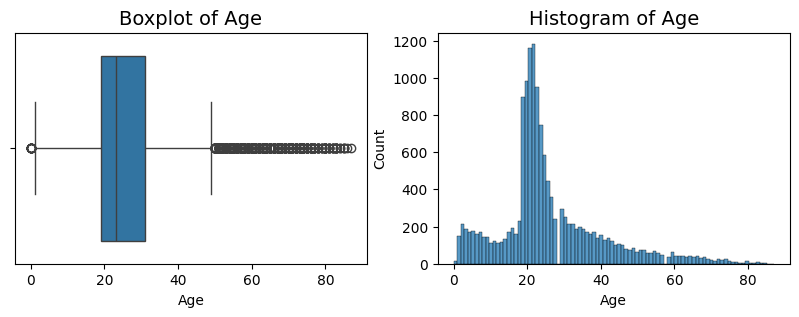

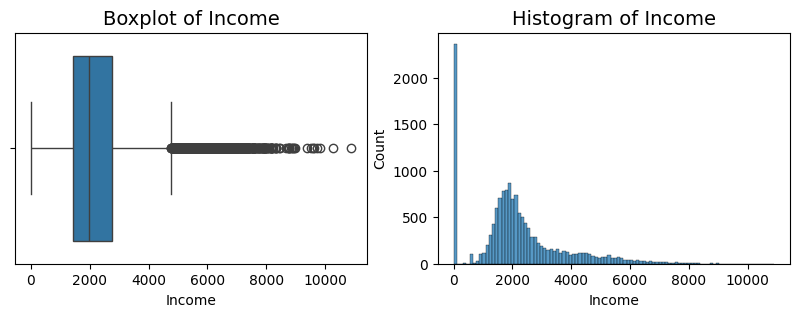

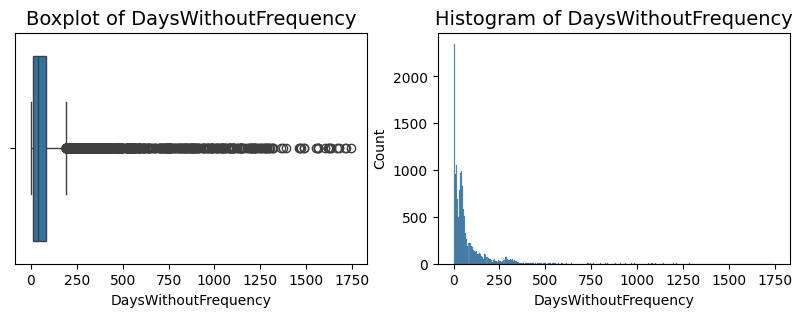

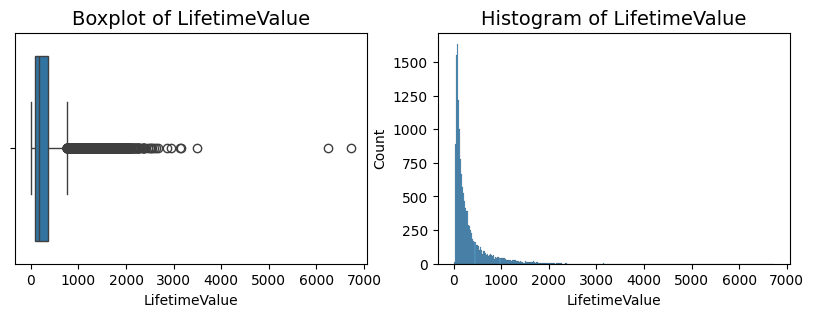

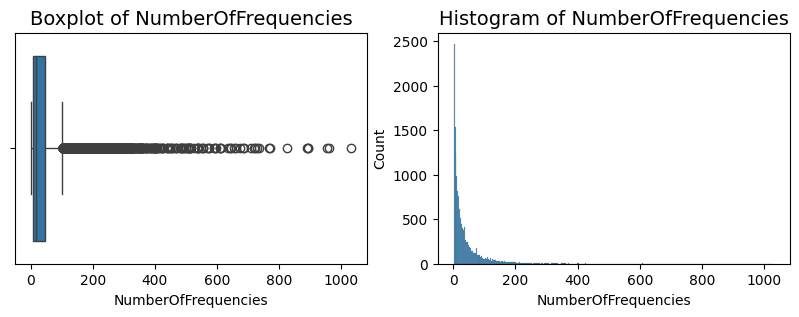

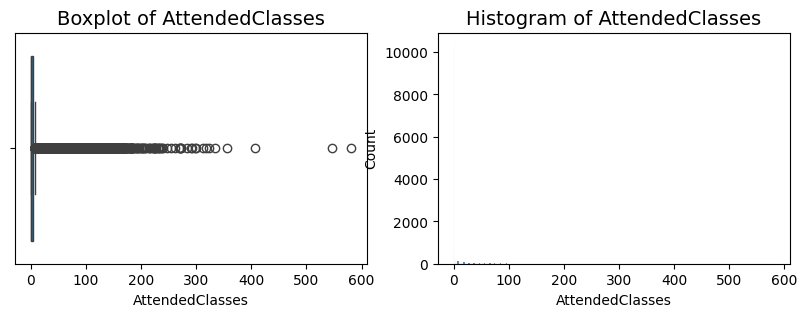

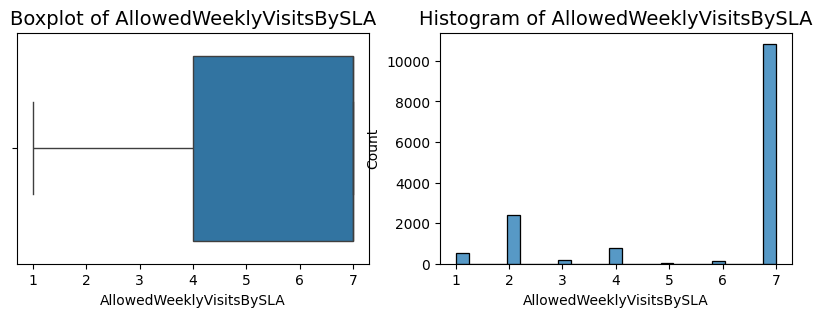

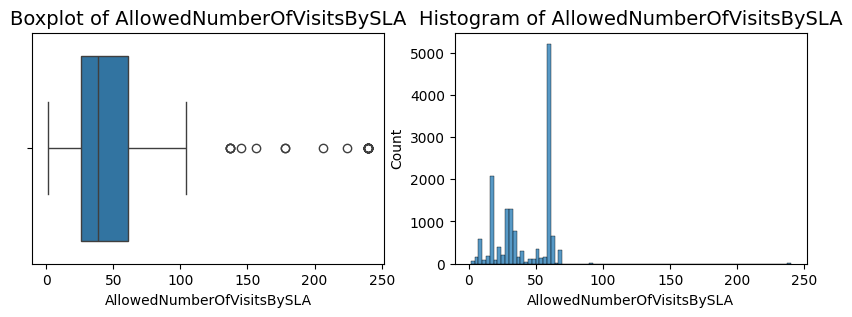

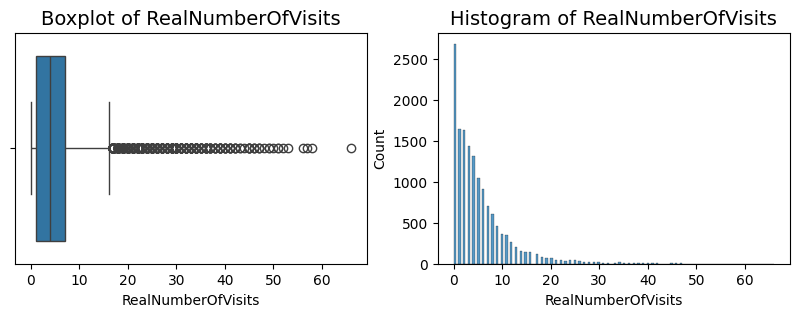

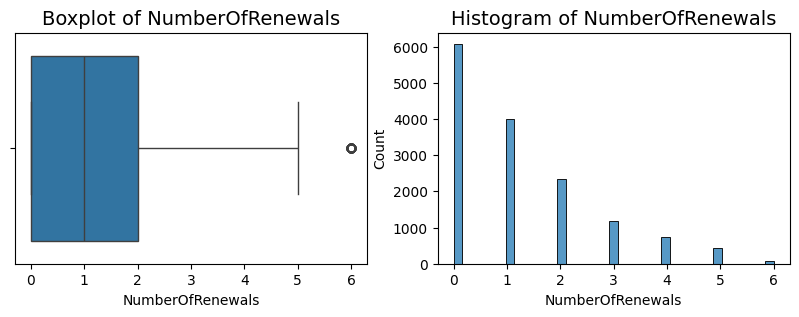

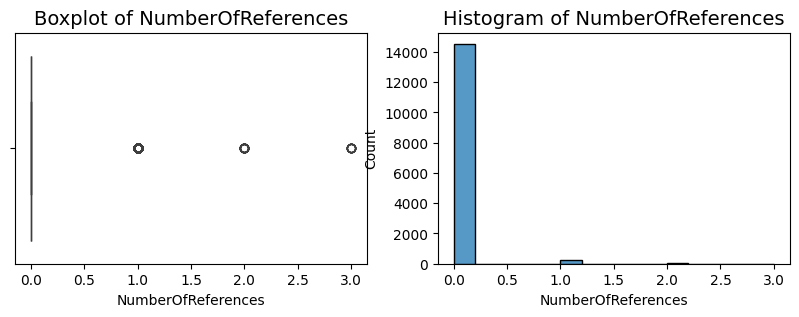

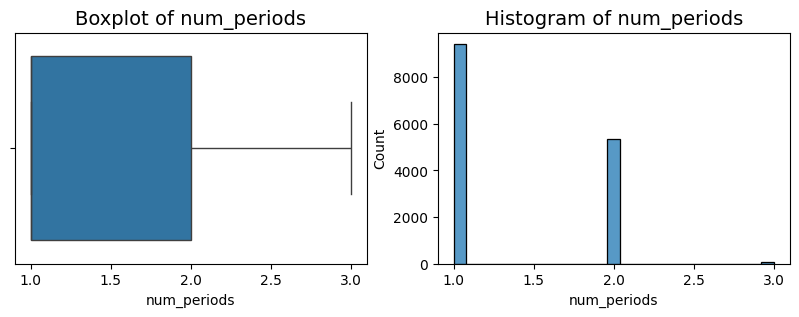

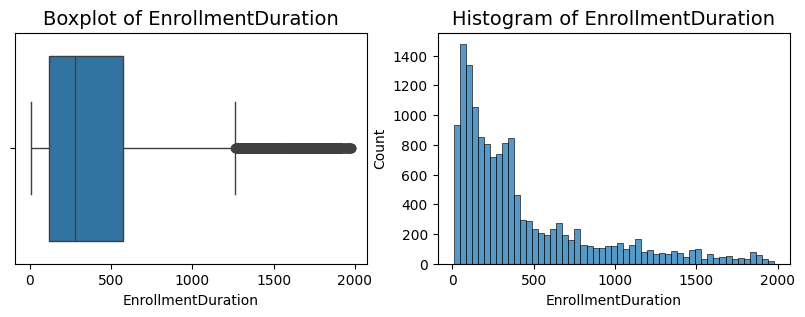

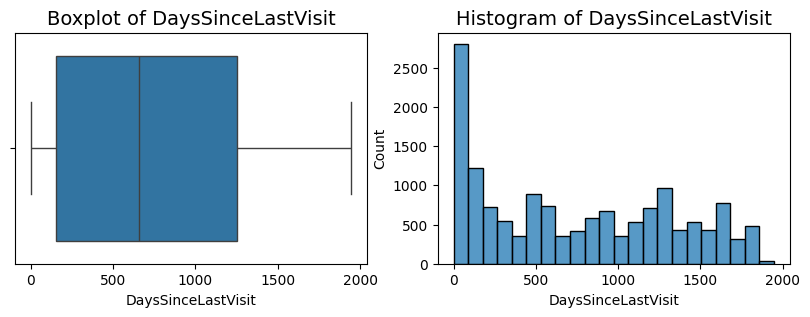

In [78]:
for feature in metric_features:
    visualize_numerical(df[feature])

____________________________________
<h4>3.7.2 Non Metric Features </h4>

In [79]:
len(non_metric_features)

15

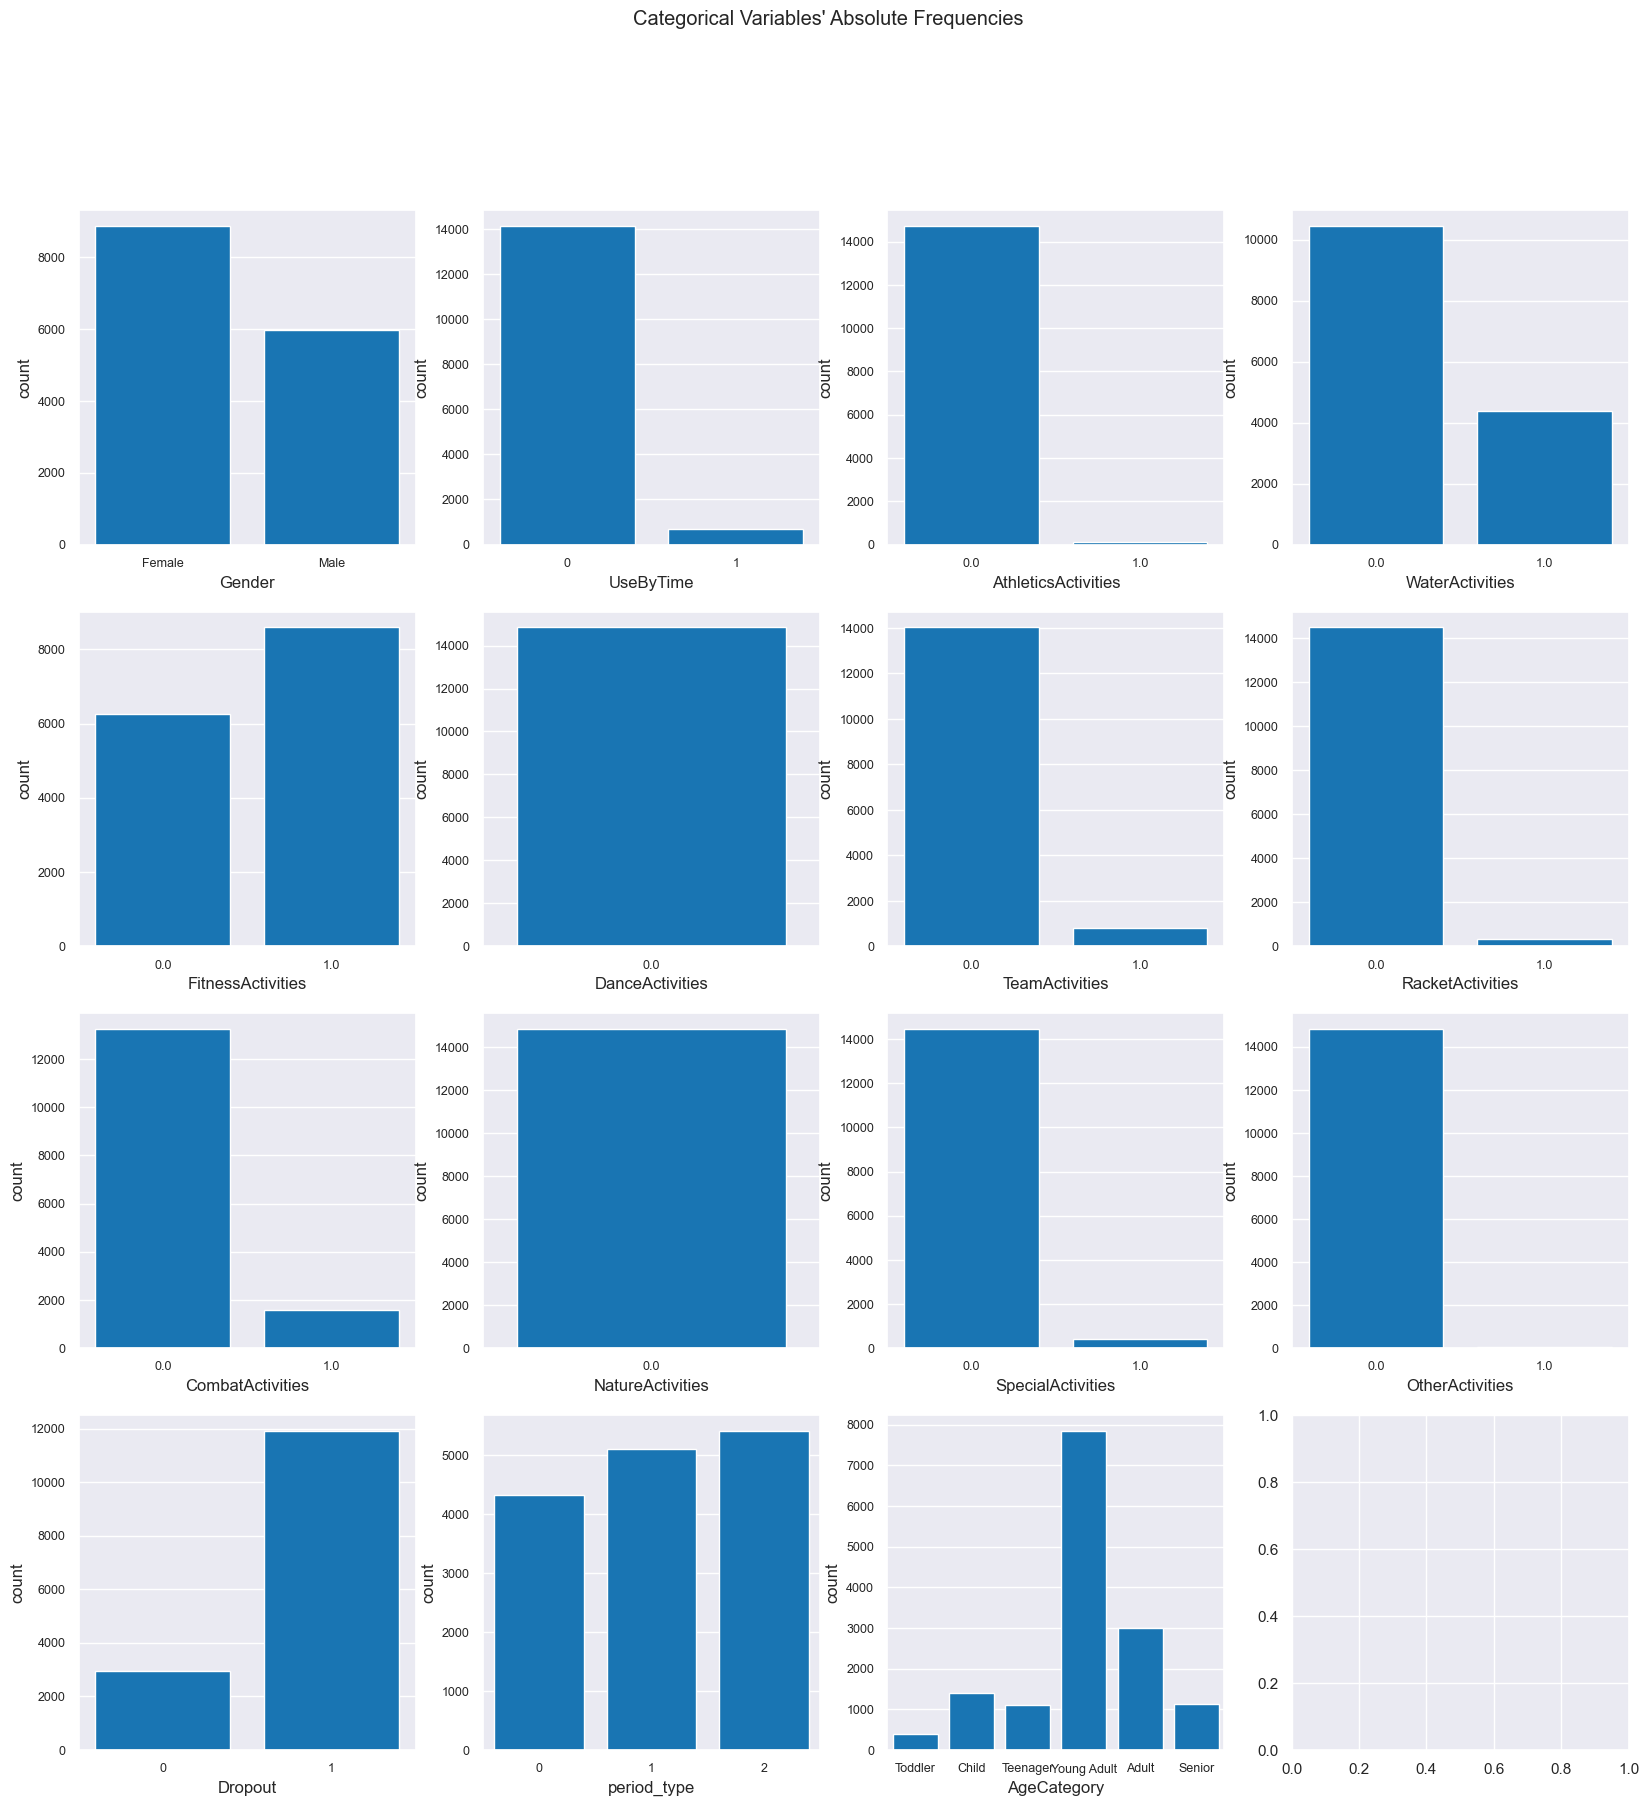

In [80]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(4, ceil(len(non_metric_features) / 4), figsize=(20, 20))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), non_metric_features):
    order = df[feat].value_counts().sort_index().index
    sns.countplot(x=df[feat].astype(object), ax=ax, color='#007acc', order=order)
    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

title = "Categorical Variables' Absolute Frequencies"
plt.suptitle(title)
plt.show()

#### Drop unvariate features

In [81]:
df.drop('NatureActivities', axis = 1, inplace = True)
df.drop('DanceActivities', axis = 1, inplace = True)

In [82]:
non_metric_features.pop(non_metric_features.index('NatureActivities'))
non_metric_features.pop(non_metric_features.index('DanceActivities'))

'DanceActivities'

In [83]:
non_metric_features

['Gender',
 'UseByTime',
 'AthleticsActivities',
 'WaterActivities',
 'FitnessActivities',
 'TeamActivities',
 'RacketActivities',
 'CombatActivities',
 'SpecialActivities',
 'OtherActivities',
 'Dropout',
 'period_type',
 'AgeCategory']

____________________________________
<h2>3.8 Metric Features - Outlier Handling </h2>

#### 1. Approach - Z-Scores

In [84]:
# Calculate Z-scores for all numeric features
z_scores = df[metric_features].apply(lambda x: (x - x.mean()) / x.std())

# Remove outliers based on Z-scores (e.g., keep data within 3 standard deviations)
df_zs = df[(z_scores.abs() < 3).all(axis=1)]

# Calculate the percentage of data removed
percentage_removed = ((len(df) - len(df_zs)) / len(df)) * 100

print(f"Percentage of data which would be removed: {percentage_removed:.2f}%")

Percentage of data which would be removed: 12.44%


#### 2. Approach - IQR

In [85]:
def IQR_outlier(df, feature):
    df_old = df
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[feature] > lower_bound) & (df[feature] < upper_bound)]

    # Calculate the percentage of data removed
    percentage_removed = ((len(df_old) - len(df)) / len(df_old)) * 100
    print(f"Percentage of data which would be removed: {feature}:  {percentage_removed:.2f}%")

    return df

In [86]:
df_IQR = df.copy()

for feature in metric_features:
    try:
        df_IQR = IQR_outlier(df_IQR, feature)
    except ZeroDivisionError:
        print()
        print('All data has been removed.')
        break

Percentage of data which would be removed: Age:  9.32%
Percentage of data which would be removed: Income:  5.76%
Percentage of data which would be removed: DaysWithoutFrequency:  10.34%
Percentage of data which would be removed: LifetimeValue:  9.96%
Percentage of data which would be removed: NumberOfFrequencies:  7.69%
Percentage of data which would be removed: AttendedClasses:  100.00%

All data has been removed.


#### 3. Approach - Manual Outlier Handling

In [87]:
# copy original dataframe
df_out = df.copy()

In [88]:
df_out.Income = df_out.Income.clip(upper=10000)
df_out.AllowedNumberOfVisitsBySLA = df_out.AllowedNumberOfVisitsBySLA.clip(upper=100)
df_out.NumberOfReferences = df_out.NumberOfReferences.clip(upper=1)

In [89]:
filters_1 = (
     (df_out['LifetimeValue'] <= 3200)
     &
    (df_out['NumberOfFrequencies'] <= 900)
     &
    (df_out['AttendedClasses'] <= 350)
     &
    (df_out['RealNumberOfVisits'] <= 60)
)

df_out = df_out[filters_1]

In [90]:
# Calculate the percentage of data removed
percentage_removed = ((len(df) - len(df_out)) / len(df)) * 100

print(f"Percentage of data which would be removed: {percentage_removed:.2f}%")

Percentage of data which would be removed: 0.07%


In [91]:
# NumberOfReferences is now categorical
metric_features.remove('NumberOfReferences')
non_metric_features.append('NumberOfReferences')

In [92]:
df = df_out

__________________________________________________
<h2>3.9 Addtional Feature Engineering </h2>

______________________________
#### IncomeCategory

In [93]:
# we create a new column called IncomeCat

# Define bin edges and labels
bin_edges = [-1, 1, 500, 1000, 3000, 5000, 11000]
bin_labels = ['No_Income', 'Very_Low', 'Low', 'Moderate', 'High', 'Very_High']

# Use the cut function to categorize the "Income" column
df['IncomeCat'] = pd.cut(df['Income'], bins=bin_edges, labels=bin_labels, include_lowest=True)
non_metric_features.append("IncomeCat")

_______________________________
#### AmountSpentPerMonth

In [94]:
# Calculate the amount of money spent on sport per month 
df["AmountSpentPerMonth"] = df["LifetimeValue"] / (df['EnrollmentDuration'] / 30).replace(0, 1)

metric_features.append("AmountSpentPerMonth")

__________________________________
#### RatioIncomeExpenses

In [95]:
# Calculate the percentage of income spent on sport per month 

df['RatioIncomeExpenses'] = (df['AmountSpentPerMonth'] / df['Income'])
metric_features.append("RatioIncomeExpenses")
df['RatioIncomeExpenses'].replace(np.inf,0, inplace=True)

_________________________
#### NumActivities

In [96]:
# Calculate the number of activities per person

df["NumActivities"] = df[["WaterActivities", "FitnessActivities", 'AthleticsActivities',
                               "TeamActivities", "CombatActivities", 'SpecialActivities',
                               "OtherActivities", 'RacketActivities']].sum(axis=1)
metric_features.append("NumActivities")

_____________________________
#### AmountSpentPerRenewal

In [97]:
# Calculate the Amount Spent Per Renewal per person

df["AmountSpentPerRenewal"] = df["LifetimeValue"] / df["NumberOfRenewals"].replace(0, 1)
metric_features.append("AmountSpentPerRenewal")

___________________
#### FrequenciesPerWeek

In [98]:
# Calculate the Amount Spent Per Renewal per person

df['FrequenciesPerWeek'] = df.NumberOfFrequencies / (df.EnrollmentDuration / 7)
metric_features.append("FrequenciesPerWeek")

______________________________________________________
#### AttendedClassesWeek

In [99]:
# Calculate the number of Attended Classes per Week per person

df['AttendedClassesWeek'] = df.AttendedClasses / (df.EnrollmentDuration / 7)
metric_features.append("AttendedClassesWeek")

______________________________________________________
#### AttendedClassesWeekCat

In [100]:
# Make categories for the number of Attended Classes per Week per person

# Define bin edges and labels
bin_edges = [-1, 0, 1, 5]
bin_labels = ['0', '0-1', '>1']

# Use the cut function to categorize the "Income" column
df['AttendedClassesWeekCat'] = pd.cut(df['AttendedClassesWeek'], bins=bin_edges, labels=bin_labels, include_lowest=False)

non_metric_features.append("AttendedClassesWeekCat")

In [101]:
df.AttendedClassesWeekCat.value_counts()

AttendedClassesWeekCat
0      10393
0-1     4148
>1       290
Name: count, dtype: int64

_________________________
#### RatioAllowedActualVisits

In [102]:
# Calculate the Ratio of Allowed Actual Visits 

df['RatioAllowedActualVisits'] = df.RealNumberOfVisits / df.AllowedNumberOfVisitsBySLA
metric_features.append("RatioAllowedActualVisits")

In [103]:
df.RatioAllowedActualVisits.value_counts().sort_index()

RatioAllowedActualVisits
0.000000    2681
0.010000       4
0.011109       2
0.011493       1
0.014489       2
            ... 
0.986990       1
0.999001       1
0.999778       1
1.132201       1
1.142857       1
Name: count, Length: 1146, dtype: int64

________________
#### Square Root of Attended classes

In [104]:
df['sqr_Att_Cla'] = np.sqrt(df['AttendedClasses'])

____________
#### Square Root AmountSpentPerMonth

In [105]:
df['sqr_Amo_Spe_Mo'] = np.sqrt(df['AmountSpentPerMonth'])

____________
#### Square Root RatioIncomeExpenses

In [106]:
df['sqr_Rat_Inc_Exp'] = np.sqrt(df['RatioIncomeExpenses'])

____________
#### Square Root AmountSpentPerRenewal

In [107]:
df['sqr_Amo_Spe_Ren'] = np.sqrt(df['AmountSpentPerRenewal'])

____________
#### Square Root FrequenciesPerWeek

In [108]:
df['sqr_Freq_Wee'] = np.sqrt(df['FrequenciesPerWeek'])

____________
#### Square Root RatioAllowedActualVisits

In [109]:
df['sqr_Rat_All_Act_Vis'] = np.sqrt(df['RatioAllowedActualVisits'])

____________
#### Square Root AttendedClassesPerWeek

In [110]:
df['sqr_Att_Cla_We'] = np.sqrt(df['AttendedClassesWeek'])

____________
#### Square Root EnrollmentDuration

In [111]:
df['sqr_Enr_Dur'] = np.sqrt(df['EnrollmentDuration'])

____________
#### Square Root DaysWithoutFrequency

In [112]:
df['sqr_Day_No_Frq'] = np.sqrt(df['DaysWithoutFrequency'])

____________________________________
<h2>3.9 Visualization New Features </h2>

In [113]:
new_metric_features = ['AmountSpentPerMonth', 'RatioIncomeExpenses', 'NumActivities', 'AmountSpentPerRenewal',
                       'FrequenciesPerWeek', 'AttendedClassesWeek', 'RatioAllowedActualVisits',
                       'sqr_Att_Cla', 'sqr_Amo_Spe_Mo', 'sqr_Rat_Inc_Exp', 'sqr_Amo_Spe_Ren', 'sqr_Freq_Wee', 'sqr_Rat_All_Act_Vis', 
                       'sqr_Att_Cla_We', 'sqr_Enr_Dur', 'sqr_Day_No_Frq']

new_non_metric_features = ['IncomeCat', 'AttendedClassesWeekCat']

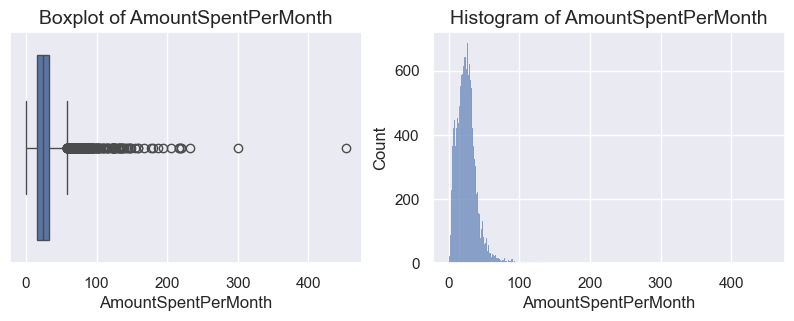

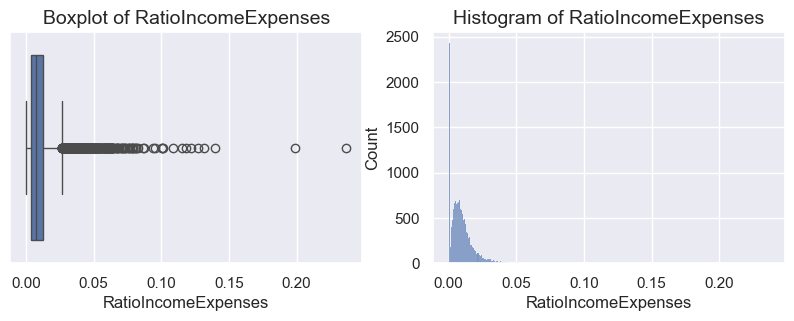

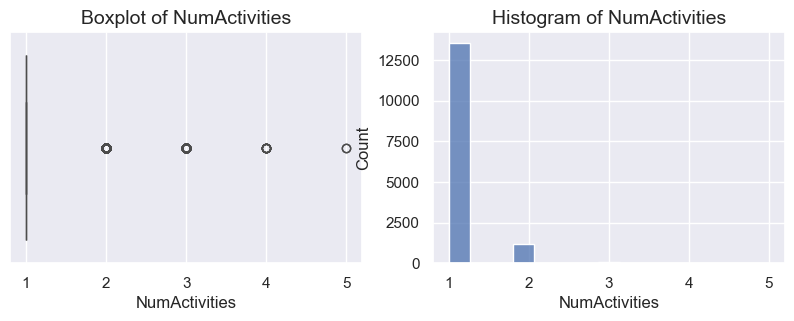

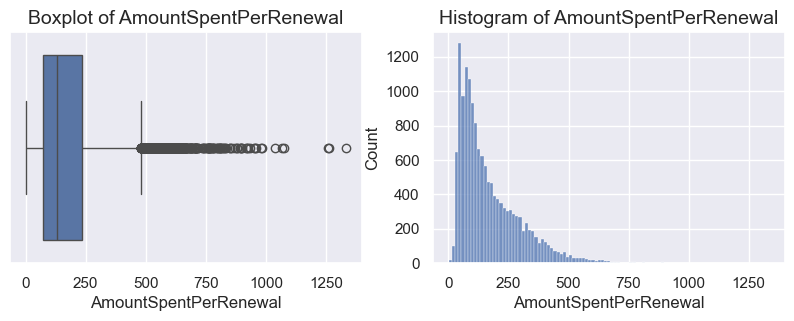

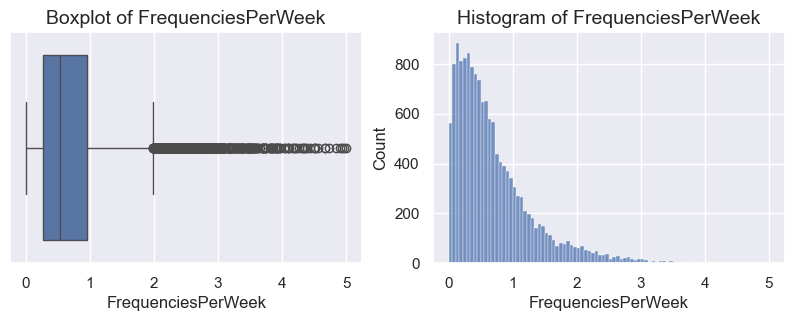

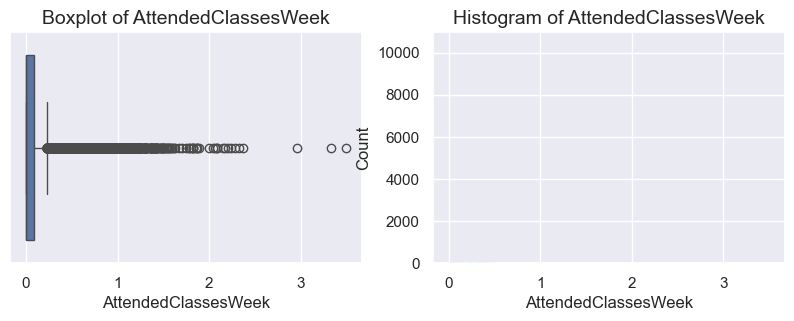

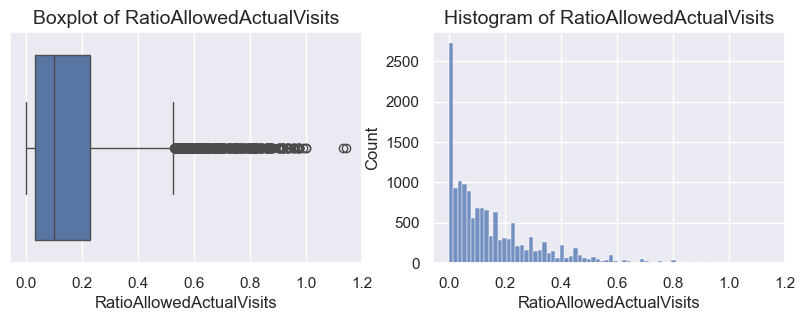

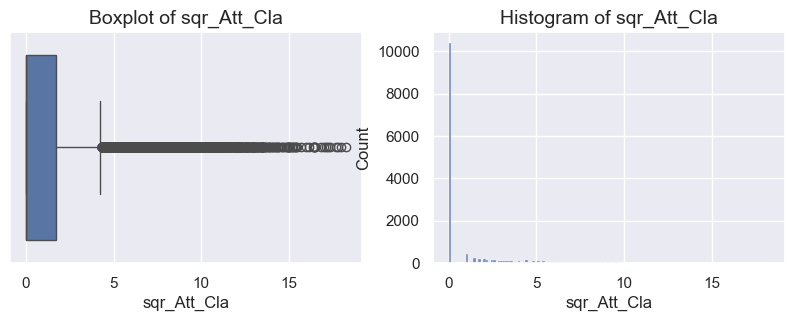

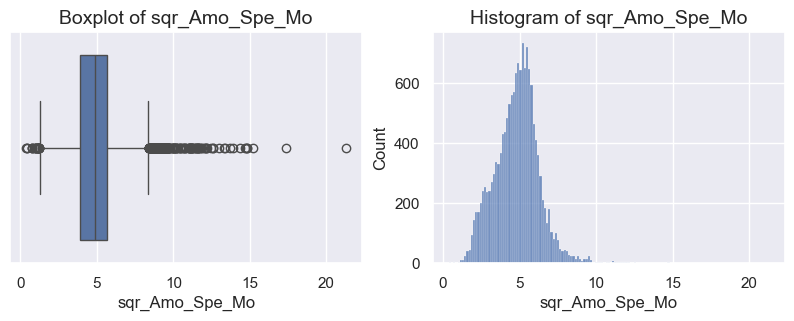

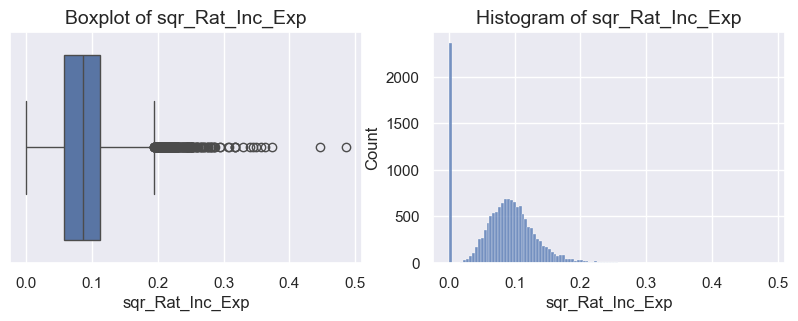

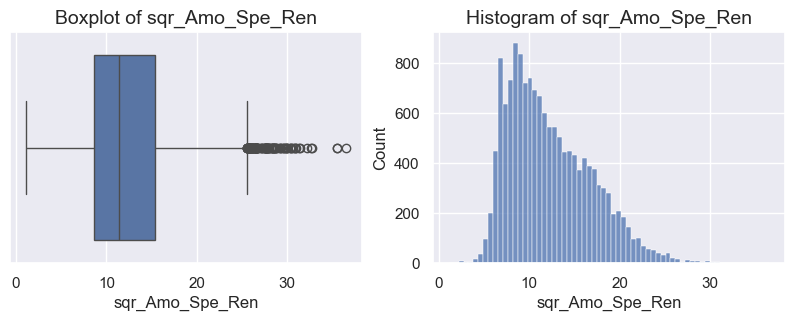

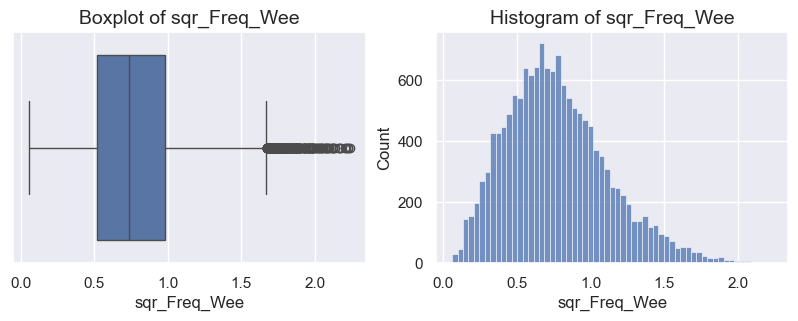

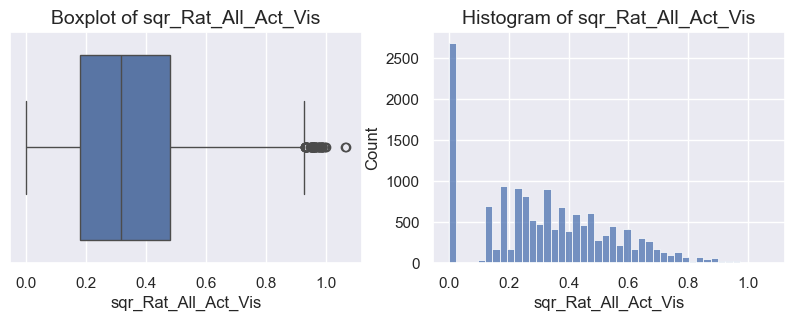

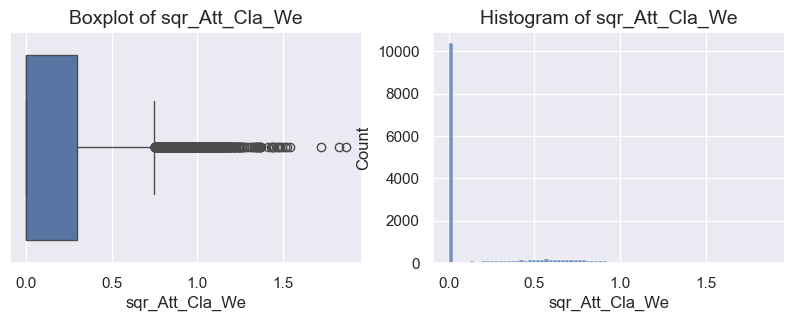

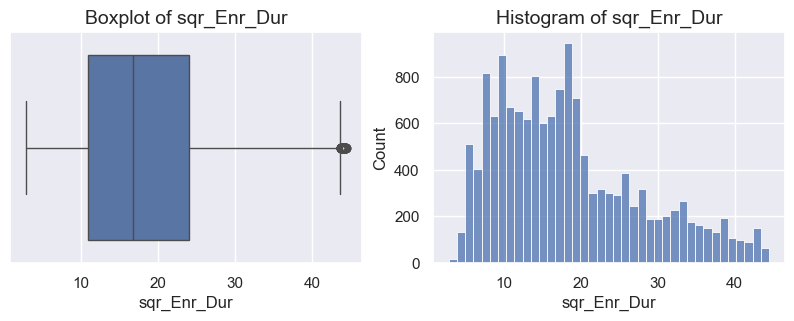

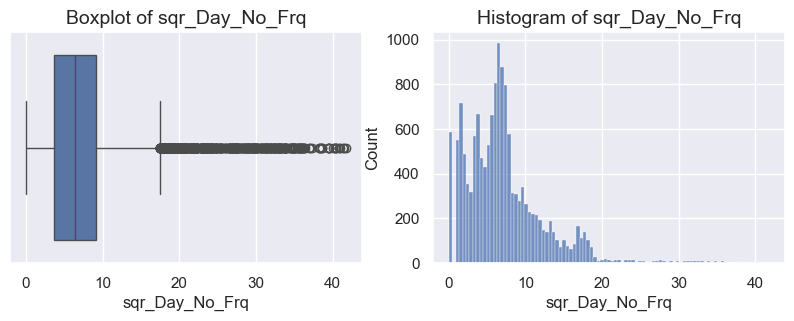

In [114]:
for feature in new_metric_features:
    visualize_numerical(df[feature])

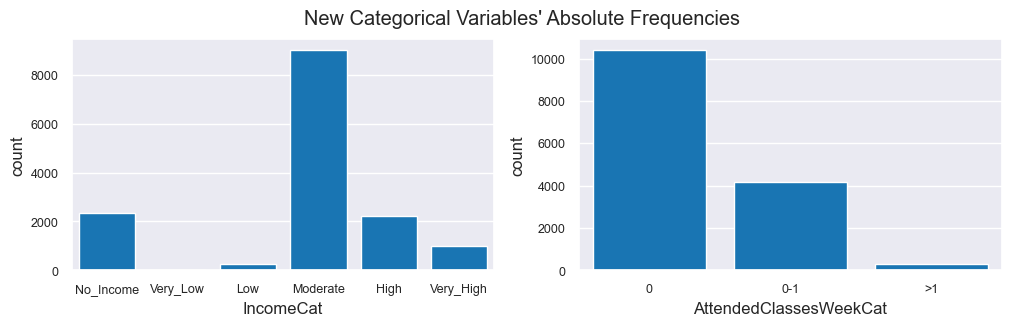

In [115]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(1, len(new_non_metric_features), figsize=(12, 3))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(),new_non_metric_features):
    order = df[feat].value_counts().sort_index().index
    sns.countplot(x=df[feat].astype(object), ax=ax, color='#007acc', order=order)
    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

title = "New Categorical Variables' Absolute Frequencies"
plt.suptitle(title)
plt.show()

_________________________
## Outlier Handling New Features

In [116]:
# copy original dataframe
df_out = df.copy()

In [117]:
new_metric_features

['AmountSpentPerMonth',
 'RatioIncomeExpenses',
 'NumActivities',
 'AmountSpentPerRenewal',
 'FrequenciesPerWeek',
 'AttendedClassesWeek',
 'RatioAllowedActualVisits',
 'sqr_Att_Cla',
 'sqr_Amo_Spe_Mo',
 'sqr_Rat_Inc_Exp',
 'sqr_Amo_Spe_Ren',
 'sqr_Freq_Wee',
 'sqr_Rat_All_Act_Vis',
 'sqr_Att_Cla_We',
 'sqr_Enr_Dur',
 'sqr_Day_No_Frq']

In [118]:
filters_2 = (
    (df_out['AmountSpentPerMonth'] <= 250)
    &
    (df_out['RatioIncomeExpenses'] <= 0.18)
    &
    (df_out['AmountSpentPerRenewal'] <= 1100)
    &
    (df_out['RatioAllowedActualVisits'] <= 1)
    &
    (df_out.sqr_Amo_Spe_Mo < 16)
    &
    (df_out.sqr_Rat_All_Act_Vis <= 1)
    &
    (df_out.sqr_Rat_Inc_Exp < 0.4)
    &
    (df_out.sqr_Amo_Spe_Ren < 33)
    &
    (df_out.sqr_Att_Cla_We < 1.6)
)

df_out = df_out[filters_2]

In [119]:
df_out.NumActivities = df_out.NumActivities.clip(upper=4)
df_out.AttendedClassesWeek = df_out.AttendedClassesWeek.clip(upper=2.5)

In [120]:
# Calculate the percentage of data removed
percentage_removed = ((len(df) - len(df_out)) / len(df)) * 100

print(f"Percentage of data which would be removed: {percentage_removed:.2f}%")

Percentage of data which would be removed: 0.08%


In [121]:
df = df_out

In [122]:
metric_features = list(set(metric_features + new_metric_features))

____________________________________
<h2>4. Correlation Metric Features </h2>

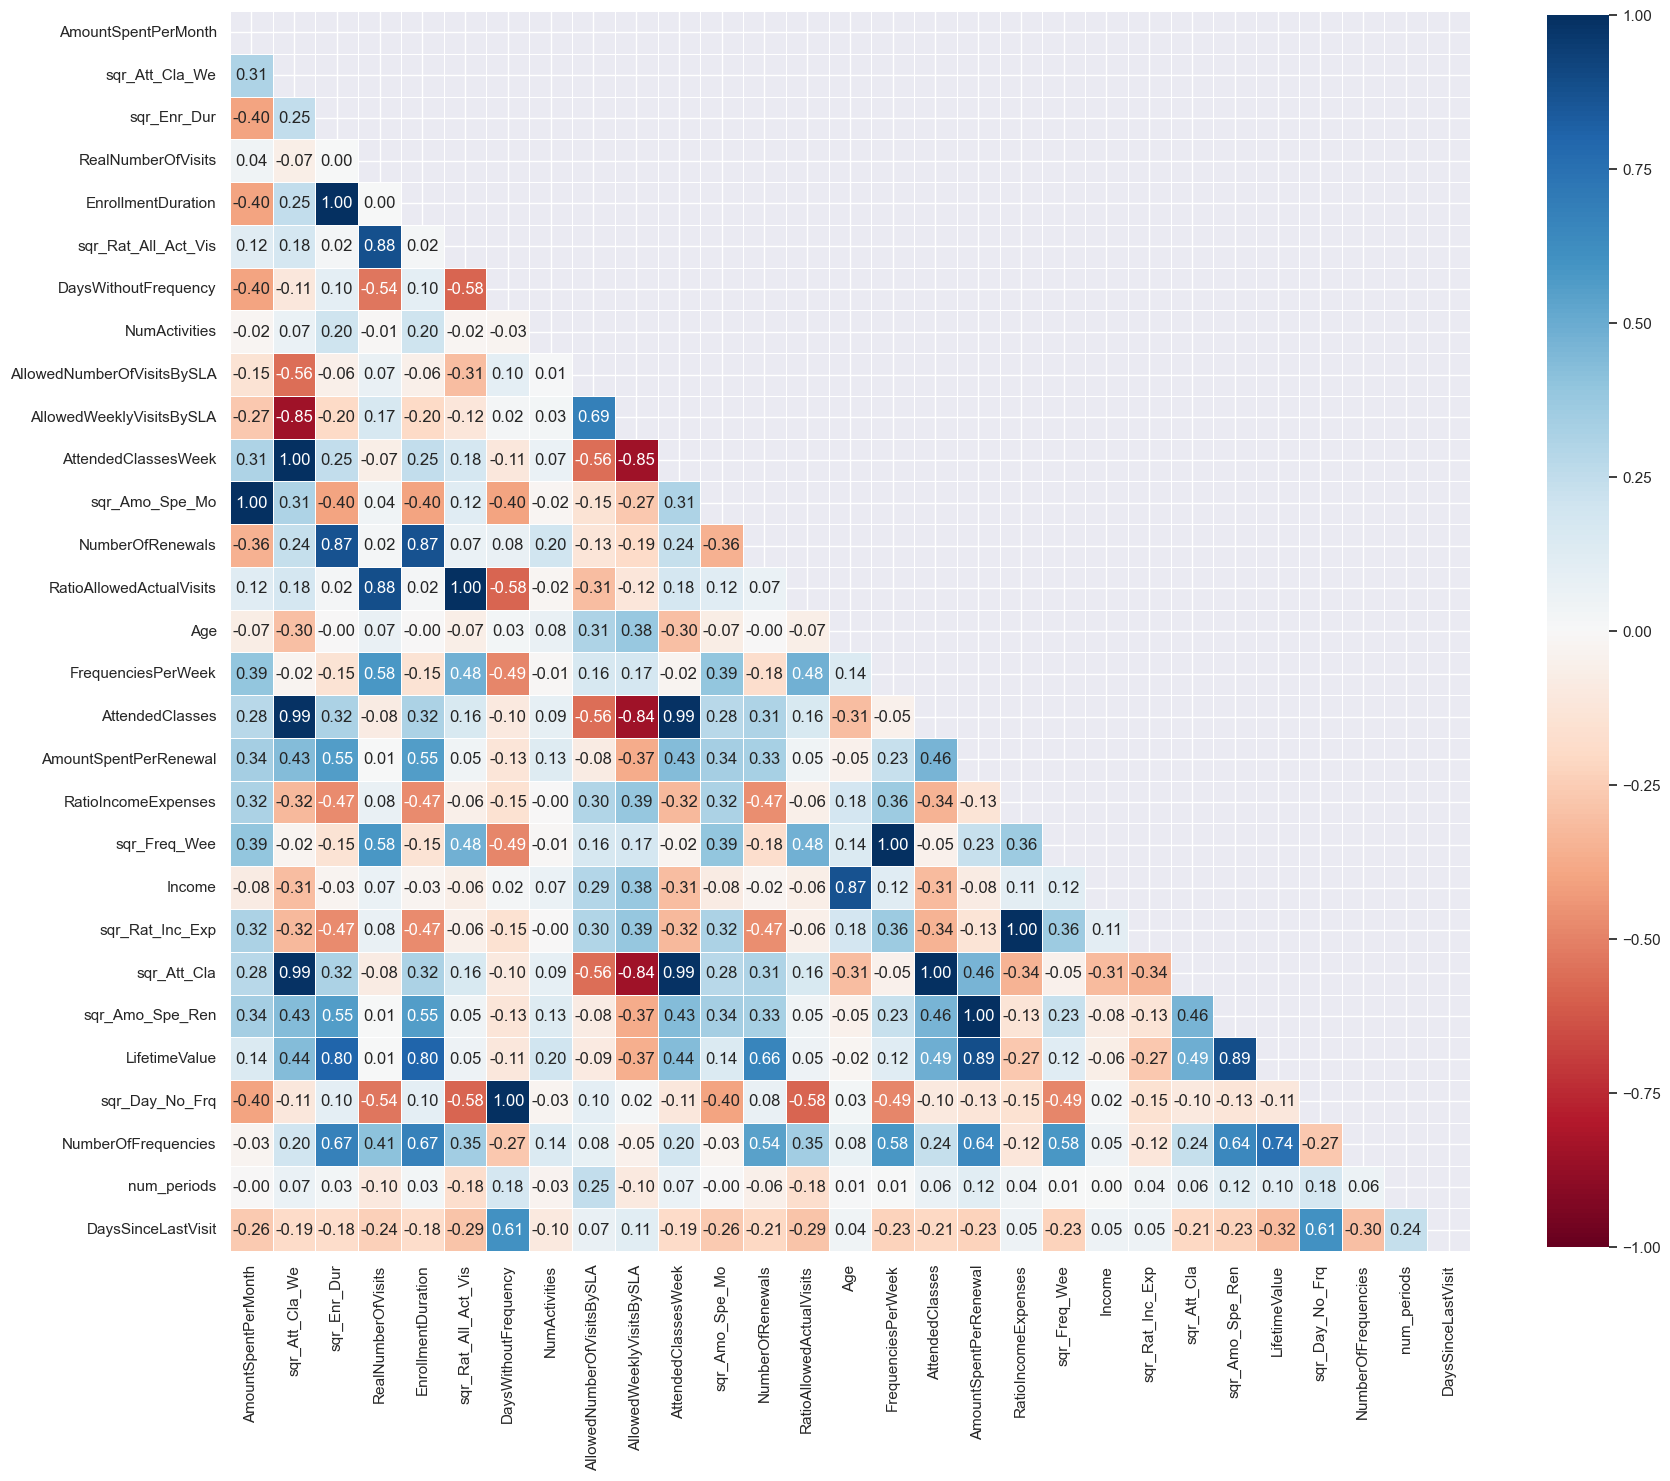

In [123]:
# Compute the correlation matrix - Spearman
corr = df[metric_features].corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=1, vmin=-1, center=0,
            square=True, annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .8})

# Show the plot
plt.show()

## Taking Correlation Matrix during feature selection into account!
Used Features for Clustering shouldnt be highly correlated nor not have any correlation at all. 

<h2>5. Data Normalization - Metric Features </h2>

In [131]:
df_scaled = df.copy().reset_index(drop=True)

In [132]:
# Extract numeric features and scale them using min max scaler
scaler = MinMaxScaler()
scaled_metric_features = pd.DataFrame(scaler.fit_transform(df[metric_features]), columns=metric_features)

In [134]:
scaled_metric_features.head()

AmountSpentPerMonth  sqr_Att_Cla_We  sqr_Enr_Dur  RealNumberOfVisits  \
0             0.198825        0.596686     0.114984            0.034483   
1             0.155267        0.086093     0.411228            0.017241   
2             0.161650        0.000000     0.063619            0.103448   
3             0.125136        0.192029     0.235875            0.051724   
4             0.061506        0.000000     0.601998            0.000000   

   EnrollmentDuration  sqr_Rat_All_Act_Vis  DaysWithoutFrequency  \
0            0.025394             0.564395              0.000573   
1            0.198070             0.239621              0.034384   
2            0.011173             0.447040              0.004011   
3            0.077197             0.411507              0.012607   
4            0.391061             0.000000              0.120344   

   NumActivities  AllowedNumberOfVisitsBySLA  AllowedWeeklyVisitsBySLA  \
0            0.0                    0.049300                  0.166667   
1            0.0                    0.162305                  0.166667   
2            0.0                    0.290221                  1.000000   
3            0.0                    0.165348                  0.166667   
4            0.0                    0.604078                  1.000000   

   AttendedClassesWeek  sqr_Amo_Spe_Mo  NumberOfRenewals  \
0             0.356034        0.432676          0.000000   
1             0.007412        0.379634          0.333333   
2             0.000000        0.387834          0.000000   
3             0.036875        0.338439          0.000000   
4             0.000000        0.230464          0.500000   

   RatioAllowedActualVisits       Age  FrequenciesPerWeek  \
0                  0.318542  0.689655            0.216674   
1                  0.057418  0.333333            0.080239   
2                  0.199845  0.264368            0.279478   
3                  0.169338  0.103448            0.174402   
4                  0.000000  0.402299            0.073108   

   AmountSpentPerRenewal  RatioIncomeExpenses  sqr_Freq_Wee  Income  \
0               0.082210             0.060239      0.451330   0.550   
1               0.222336             0.098459      0.264653   0.263   
2               0.033947             0.136138      0.516132   0.198   
3               0.143810             0.000000      0.402247   0.000   
4               0.114899             0.023881      0.251484   0.432   

   sqr_Rat_Inc_Exp  sqr_Att_Cla  sqr_Amo_Spe_Ren  LifetimeValue  \
0         0.245437     0.144769         0.263895       0.029974   
1         0.313782     0.054718         0.454198       0.162689   
2         0.368968     0.000000         0.159038       0.012357   
3         0.000000     0.077382         0.359052       0.052460   
4         0.154535     0.000000         0.317608       0.126604   

   sqr_Day_No_Frq  NumberOfFrequencies  num_periods  DaysSinceLastVisit  
0        0.023939             0.008969          0.0            0.000514  
1        0.185429             0.024664          0.5            0.805755  
2        0.063336             0.005605          0.0            0.456835  
3        0.112283             0.021300          0.5            0.145427  
4        0.346906             0.044843          0.0            0.370504

In [135]:
df_scaled[metric_features] = scaled_metric_features

In [136]:
df_scaled.shape

(14819, 44)

In [137]:
df_scaled.head()

Age  Gender  Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
0  0.689655  Female   0.550              0.000573       0.029974          0   
1  0.333333  Female   0.263              0.034384       0.162689          0   
2  0.264368    Male   0.198              0.004011       0.012357          0   
3  0.103448    Male   0.000              0.012607       0.052460          0   
4  0.402299    Male   0.432              0.120344       0.126604          0   

   AthleticsActivities  WaterActivities  FitnessActivities  TeamActivities  \
0                  0.0              0.0                1.0             0.0   
1                  0.0              0.0                0.0             0.0   
2                  0.0              0.0                1.0             0.0   
3                  0.0              0.0                0.0             1.0   
4                  0.0              0.0                1.0             0.0   

   RacketActivities  CombatActivities  SpecialActivities  OtherActivities  \
0               0.0               0.0                0.0              0.0   
1               0.0               0.0                1.0              0.0   
2               0.0               0.0                0.0              0.0   
3               0.0               0.0                0.0              0.0   
4               0.0               0.0                0.0              0.0   

   NumberOfFrequencies  AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
0             0.008969                  0.166667                    0.049300   
1             0.024664                  0.166667                    0.162305   
2             0.005605                  1.000000                    0.290221   
3             0.021300                  0.166667                    0.165348   
4             0.044843                  1.000000                    0.604078   

   RealNumberOfVisits  NumberOfRenewals  NumberOfReferences  Dropout  \
0            0.034483          0.000000                   0        0   
1            0.017241          0.333333                   0        1   
2            0.103448          0.000000                   0        1   
3            0.051724          0.000000                   0        1   
4            0.000000          0.500000                   0        1   

   EnrollmentDuration  num_periods  period_type  DaysSinceLastVisit  \
0            0.025394          0.0            1            0.000514   
1            0.198070          0.5            2            0.805755   
2            0.011173          0.0            0            0.456835   
3            0.077197          0.5            2            0.145427   
4            0.391061          0.0            0            0.370504   

   AgeCategory  IncomeCat  AmountSpentPerMonth  RatioIncomeExpenses  \
0       Senior  Very_High             0.198825             0.060239   
1  Young Adult   Moderate             0.155267             0.098459   
2  Young Adult   Moderate             0.161650             0.136138   
3        Child  No_Income             0.125136             0.000000   
4        Adult       High             0.061506             0.023881   

   NumActivities  AmountSpentPerRenewal  FrequenciesPerWeek  \
0            0.0               0.082210            0.216674   
1            0.0               0.222336            0.080239   
2            0.0               0.033947            0.279478   
3            0.0               0.143810            0.174402   
4            0.0               0.114899            0.073108   

   AttendedClassesWeek AttendedClassesWeekCat  RatioAllowedActualVisits  \
0             0.356034                    0-1                  0.318542   
1             0.007412                    0-1                  0.057418   
2             0.000000                      0                  0.199845   
3             0.036875                    0-1                  0.169338   
4             0.000000                      0                  0.000000   

   

____________________________________
<h2>7. PCA </h2>

In [138]:
df_pca = df_scaled.copy()

_____________
## !!! PCA approach for feature reduction was tried and dropped as there was a lack of explainability of the PCA features to use in the clustering process. Dataframe still has the name df_pca. No inpact in results. !!!
_____________

<h1>7. Clustering Algorithms  </h1>

<h3> 7.1 Define the perspectives </h3>


In [139]:
# divide metric features into 2 perspectives: demographic/behavioral and preference perspective
metric_features

['AmountSpentPerMonth',
 'sqr_Att_Cla_We',
 'sqr_Enr_Dur',
 'RealNumberOfVisits',
 'EnrollmentDuration',
 'sqr_Rat_All_Act_Vis',
 'DaysWithoutFrequency',
 'NumActivities',
 'AllowedNumberOfVisitsBySLA',
 'AllowedWeeklyVisitsBySLA',
 'AttendedClassesWeek',
 'sqr_Amo_Spe_Mo',
 'NumberOfRenewals',
 'RatioAllowedActualVisits',
 'Age',
 'FrequenciesPerWeek',
 'AmountSpentPerRenewal',
 'RatioIncomeExpenses',
 'sqr_Freq_Wee',
 'Income',
 'sqr_Rat_Inc_Exp',
 'sqr_Att_Cla',
 'sqr_Amo_Spe_Ren',
 'LifetimeValue',
 'sqr_Day_No_Frq',
 'NumberOfFrequencies',
 'num_periods',
 'DaysSinceLastVisit']

In [261]:
metric_features_profiling = ['Age', 'Income', 'AllowedWeeklyVisitsBySLA', 'NumberOfRenewals',
                             'LifetimeValue', 'EnrollmentDuration', 'sqr_Att_Cla', 'RatioAllowedActualVisits', 'DaysWithoutFrequency',
                             'AttendedClassesWeek', 'FrequenciesPerWeek', 'RealNumberOfVisits', 'NumberOfFrequencies', 'DaysSinceLastVisit',]

In [142]:
# related to customer characteristics
demographic_features = [
    'Age',
    # 'sqr_Enr_Dur',
    # 'sqr_Amo_Spe_Mo',
    # 'sqr_Rat_Inc_Exp',
    # 'sqr_Amo_Spe_Ren',
    'NumberOfRenewals',
    'AllowedWeeklyVisitsBySLA',
    # 'EnrollmentDuration',
    #'AmountSpentPerMonth',
    #'RatioIncomeExpenses',
    'LifetimeValue'
]

# related to actual usage of the gym, customers preferences
preference_features = [
    # 'sqr_Freq_Wee',
    # 'sqr_Att_Cla_We',
    # 'sqr_Day_No_Frq',
    # 'sqr_Rat_All_Act_Vis',
    'DaysWithoutFrequency',
    'NumberOfFrequencies',
    'DaysSinceLastVisit',
    #'FrequenciesPerWeek',
    'AttendedClassesWeek',
    # 'RatioAllowedActualVisits',
    'RealNumberOfVisits'
]

df_dem = df_pca[demographic_features].copy()
df_prf = df_pca[preference_features].copy()

<h3> 7.2 K-means and  MeanShift Clustering </h3>

In [143]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust

# Set up the clusterers
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

meansshift = MeanShift(bin_seeding=True, n_jobs=4)

In [144]:
# # find initial bandwith
# bandwidth_dem = estimate_bandwidth(df_dem, quantile=0.06, random_state=1, n_jobs=-1)
# bandwidth_dem

In [145]:
def get_r2_scores_ms_dem(df, clusterer):
    """
    Loop over different values of bandwith. To be used with sklearn means shift clusterer.
    """
    r2_clust = {}
    # create range of bandwith based on estimated bandwith for specific feature set
    for bandwidth in [x * 0.02 for x in range(12, 26)]:
        print('Current bandwith used for Mean Shift Clustering: ', bandwidth)
        clust = clone(clusterer).set_params(bandwidth=bandwidth)
        ms_labels = clust.fit_predict(df)
        ms_n_clusters = len(np.unique(ms_labels))
        r2_clust[ms_n_clusters] = r2(df, ms_labels)
    return r2_clust

#### Finding the optimal clusterer on demographic variables

In [146]:
# Obtaining the R² scores for each cluster solution on demographic variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_dem, kmeans)

# r2_scores_ms_dem = {}
# r2_scores_ms_dem['ms'] = get_r2_scores_ms_dem(df_dem, meansshift)

In [147]:
# pd.DataFrame(r2_scores_ms_dem)

In [148]:
pd.DataFrame(r2_scores)

kmeans
2  0.566909
3  0.694415
4  0.761070
5  0.795299
6  0.823073
7  0.844518
8  0.858304
9  0.871023

In [149]:
# # Visualizing the R² scores for each Mean Shift cluster solution on demographic variables
# pd.DataFrame(r2_scores_ms_dem).plot.line(figsize=(10,7))

# plt.title("Demographic Variables:\nR² plot for various Mean Shift clustering\n", fontsize=21)
# plt.legend(title="Cluster methods", title_fontsize=11)
# plt.xlabel("Number of clusters", fontsize=13)
# plt.ylabel("R² metric", fontsize=13)
# plt.show()

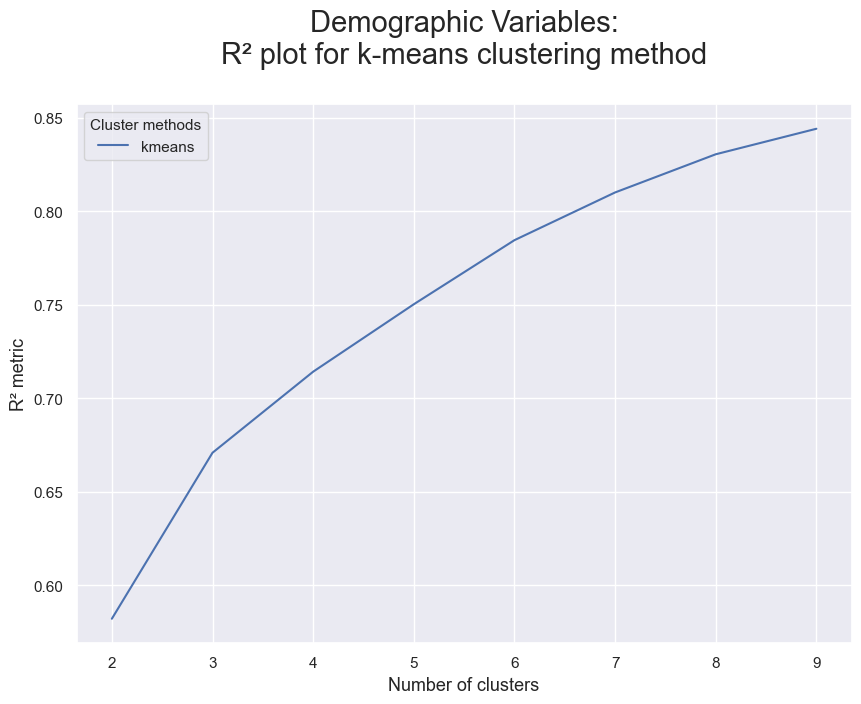

In [266]:
# Visualizing the R² scores for each cluster solution on demographic variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Demographic Variables:\nR² plot for k-means clustering method\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

#### Finding the optimal clusterer on preference variables

In [151]:
# # find initial bandwith for specific feature set
# bandwidth = estimate_bandwidth(df_prf, quantile=0.06, random_state=1, n_jobs=-1)
# bandwidth

In [152]:
# # create range of bandwith based on estimated bandwith for specific feature set
# def get_r2_scores_ms_prf(df, clusterer):
#     """
#     Loop over different values of bandwith. To be used with sklearn means shift clusterer.
#     """
#     r2_clust = {}
#     # create range of bandwith based on estimated bandwith for specific feature set
#     for bandwidth in [x * 0.02 for x in range(6, 16)]:
#         print('Current bandwith used for Mean Shift Clustering: ', bandwidth)
#         clust = clone(clusterer).set_params(bandwidth=bandwidth)
#         ms_labels = clust.fit_predict(df)
#         ms_n_clusters = len(np.unique(ms_labels))
#         r2_clust[ms_n_clusters] = r2(df, ms_labels)
#     return r2_clust

In [153]:
# Obtaining the R² scores for each cluster solution on demographic variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_prf, kmeans)

# for linkage in ['complete', 'average', 'single', 'ward']:
#     r2_scores[linkage] = get_r2_scores(
#         df_prf, hierarchical.set_params(linkage=linkage)
#     )

# r2_scores_ms_prf = {}
# r2_scores_ms_prf['ms'] = get_r2_scores_ms_prf(df_prf, meansshift)

In [154]:
# pd.DataFrame(r2_scores_ms_prf)

In [155]:
pd.DataFrame(r2_scores)

kmeans
2  0.582019
3  0.670837
4  0.714202
5  0.750282
6  0.784575
7  0.810107
8  0.830534
9  0.844186

In [156]:
# # Visualizing the R² scores for each Mean Shift cluster solution on product variables
# pd.DataFrame(r2_scores_ms_prf).plot.line(figsize=(10,7))

# plt.title("Preference Variables:\nR2 plot for various Mean Shift clustering\n", fontsize=21)
# plt.legend(title="Cluster methods", title_fontsize=11)
# plt.xlabel("Number of clusters", fontsize=13)
# plt.ylabel("R2 metric", fontsize=13)
# plt.show()

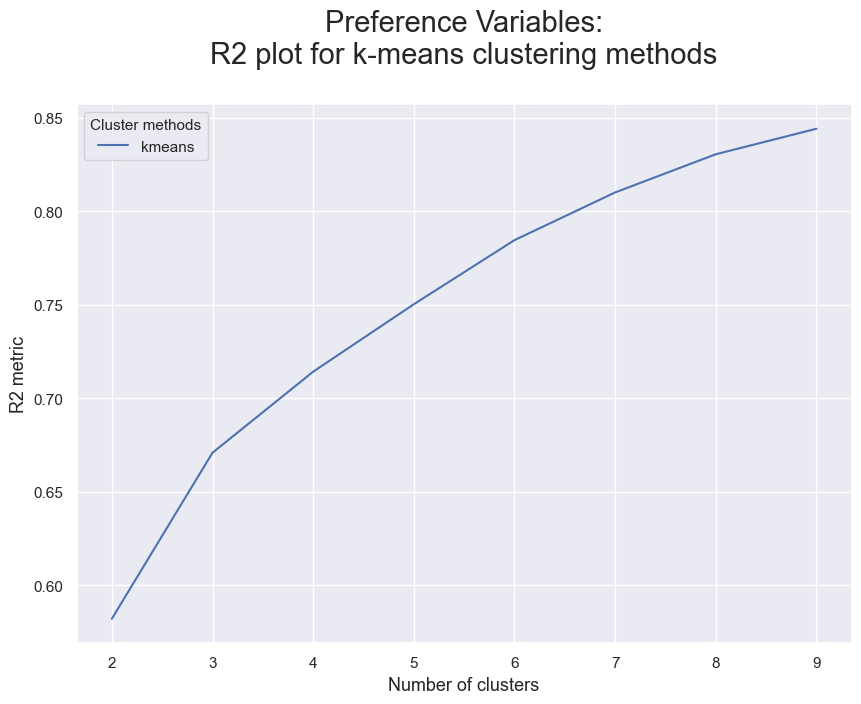

In [267]:
# Visualizing the R² scores for each cluster solution on product variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Preference Variables:\nR2 plot for k-means clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

#### Merging the perspectives by applying the best clustering for each of them

Choice of method and number of clusters:
We want high R2 score but also practical number of clusters.

In [158]:
kmeans_prf = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init=20,
    random_state=42
)
prf_labels = kmeans_prf.fit_predict(df_prf)

kmeans_demo = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=20,
    random_state=42
)
demographic_labels = kmeans_demo.fit_predict(df_dem)

df_pca['preference_labels'] = prf_labels
df_pca['demographic_labels'] = demographic_labels

In [159]:
df_pca

Age  Gender    Income  DaysWithoutFrequency  LifetimeValue  \
0      0.689655  Female  0.550000              0.000573       0.029974   
1      0.333333  Female  0.263000              0.034384       0.162689   
2      0.264368    Male  0.198000              0.004011       0.012357   
3      0.103448    Male  0.000000              0.012607       0.052460   
4      0.402299    Male  0.432000              0.120344       0.126604   
...         ...     ...       ...                   ...            ...   
14814  0.160920    Male  0.000000              0.001146       0.496732   
14815  0.448276    Male  0.350859              0.021777       0.116613   
14816  0.229885    Male  0.181000              0.001146       0.014400   
14817  0.632184    Male  0.480000              0.001719       0.268017   
14818  0.367816  Female  0.370000              0.008023       0.312613   

       UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  \
0              0                  0.0              0.0                1.0   
1              0                  0.0              0.0                0.0   
2              0                  0.0              0.0                1.0   
3              0                  0.0              0.0                0.0   
4              0                  0.0              0.0                1.0   
...          ...                  ...              ...                ...   
14814          0                  0.0              1.0                0.0   
14815          0                  0.0              0.0                0.0   
14816          0                  0.0              0.0                1.0   
14817          0                  0.0              1.0                0.0   
14818          0                  0.0              0.0                1.0   

       TeamActivities  RacketActivities  CombatActivities  SpecialActivities  \
0                 0.0               0.0               0.0                0.0   
1                 0.0               0.0               0.0                1.0   
2                 0.0               0.0               0.0                0.0   
3                 1.0               0.0               0.0                0.0   
4                 0.0               0.0               0.0                0.0   
...               ...               ...               ...                ...   
14814             0.0               0.0               0.0                0.0   
14815             0.0               0.0               1.0                0.0   
14816             0.0               0.0               0.0                0.0   
14817             0.0               0.0               0.0                0.0   
14818             0.0               0.0               0.0                0.0   

       OtherActivities  NumberOfFrequencies  AllowedWeeklyVisitsBySLA  \
0                  0.0             0.008969                  0.166667   
1                  0.0             0.024664                  0.166667   
2                  0.0             0.005605                  1.000000   
3                  0.0             0.021300                  0.166667   
4                  0.0             0.044843                  1.000000   
...                ...                  ...                       ...   
14814              0.0             0.124439                  0.500000   
14815              0.0             0.062780                  1.000000   
14816              0.0             0.005605                  1.000000   
14817              0.0             0.206278                  0.333333   
14818              0.0             0.188341                  1.000000   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
0                        0.049300            0.034483          0.000000   
1                        0.162305            0.017241          0.333333   
2                        0.290221            0.103448          0.000000   
3                        0.165348            0.051724       

In [160]:
# Count label frequencies (contigency table)

pd.crosstab(df_pca['demographic_labels'],
            df_pca['preference_labels'])

preference_labels      0     1     2    3    4
demographic_labels                            
0                     61   296   190  445    4
1                   3212  2086  2270   58  361
2                    451  1070   968   59  435
3                    991   601   629  631    1

In [161]:
df_cluster_size = pd.crosstab(df_pca['demographic_labels'], df_pca['preference_labels'])

size_clusters = {}
for i in range(df_pca.demographic_labels.nunique()):
    for j in range(df_pca.preference_labels.nunique()):
        size_clusters[(i, j)] = df_cluster_size.loc[i, j]

In [162]:
size_clusters_sorted = {k: v for k, v in sorted(size_clusters.items(), key=lambda item: item[1])}

In [163]:
size_clusters_sorted

{(3, 4): 1,
 (0, 4): 4,
 (1, 3): 58,
 (2, 3): 59,
 (0, 0): 61,
 (0, 2): 190,
 (0, 1): 296,
 (1, 4): 361,
 (2, 4): 435,
 (0, 3): 445,
 (2, 0): 451,
 (3, 1): 601,
 (3, 2): 629,
 (3, 3): 631,
 (2, 2): 968,
 (3, 0): 991,
 (2, 1): 1070,
 (1, 1): 2086,
 (1, 2): 2270,
 (1, 0): 3212}

### Merging manualy the smallest clusters into those with their closest centroids

In [164]:
# Centroids of clusters
df_centroids = df_pca.groupby(['demographic_labels', 'preference_labels'])\
    [metric_features].mean()

# Clusters with low frequency to be merged:
# (behavior_labels, product_labels)
to_merge = list(size_clusters_sorted.keys())[:5]

# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids.index, index=df_centroids.index
)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

{(3, 4): (3, 1),
 (0, 4): (0, 3),
 (1, 3): (3, 3),
 (2, 3): (0, 3),
 (0, 0): (0, 2)}

In [165]:
df_ = df_pca.copy()

# Changing the demographic_labels and preference_labels based on source_target
for source, target in source_target.items():
    mask = (df_['demographic_labels']==source[0]) & (df_['preference_labels']==source[1])
    df_.loc[mask, 'demographic_labels'] = target[0]
    df_.loc[mask, 'preference_labels'] = target[1]

# New contigency table

pd.crosstab(df_['demographic_labels'],
            df_['preference_labels'])

preference_labels      0     1     2    3    4
demographic_labels                            
0                      0   296   251  508    0
1                   3212  2086  2270    0  361
2                    451  1070   968    0  435
3                    991   602   629  689    0

### Merging using Hierarchical clustering

In [205]:
# Centroids of the concatenated cluster labels
df_centroids = df_.groupby(['demographic_labels', 'preference_labels'])\
    [metric_features].mean()
df_centroids

AmountSpentPerMonth  sqr_Att_Cla_We  \
demographic_labels preference_labels                                        
0                  1                             0.097290        0.291835   
                   2                             0.097395        0.311175   
                   3                             0.140300        0.534895   
1                  0                             0.083016        0.007438   
                   1                             0.140573        0.018208   
                   2                             0.117567        0.005103   
                   4                             0.139010        0.024561   
2                  0                             0.064865        0.031422   
                   1                             0.067479        0.023394   
                   2                             0.068911        0.023552   
                   4                             0.093655        0.029492   
3                  0                             0.126630        0.352009   
                   1                             0.145440        0.260510   
                   2                             0.127498        0.298725   
                   3                             0.169682        0.568714   

                                      sqr_Enr_Dur  RealNumberOfVisits  \
demographic_labels preference_labels                                    
0                  1                     0.803010            0.060403   
                   2                     0.705019            0.034620   
                   3                     0.766886            0.113427   
1                  0                     0.277694            0.083212   
                   1                     0.218155            0.085918   
                   2                     0.217370            0.070728   
                   4                     0.273103            0.397316   
2                  0                     0.508802            0.074012   
                   1                     0.677934            0.077941   
                   2                     0.567382            0.066668   
                   4                     0.724571            0.350178   
3                  0                     0.331484            0.043304   
                   1                     0.326326            0.053213   
                   2                     0.337730            0.026451   
                   3                     0.332889            0.116886   

                                      EnrollmentDuration  sqr_Rat_All_Act_Vis  \
demographic_labels preference_labels                                            
0                  1                            0.675576             0.414456   
                   2                            0.535655             0.244809   
                   3                            0.626235             0.494471   
1                  0                            0.111463             0.284394   
                   1                            0.082731             0.316215   
                   2                            0.080390             0.261704   
                   4                            0.111994             0.642587   
2                  0                            0.313006             0.236095   
                   1                            0.509878             0.283986   
                   2                            0.371977             0.238704   
                   4                            0.571249             0.589356   
3                  0                            0.147544             0.282978   
                   1                            0.155847             0.388542   
                   2                            0.160015             0.207781   
                   3                            0.162058             0.563020   

                                      DaysWithoutFrequency  NumActivities  \
demographic_labels preference_l

In [206]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

In [207]:
hclust_labels

array([11,  7, 12,  9, 14, 10, 13,  6,  8,  5,  3,  2,  4,  1,  0],
      dtype=int64)

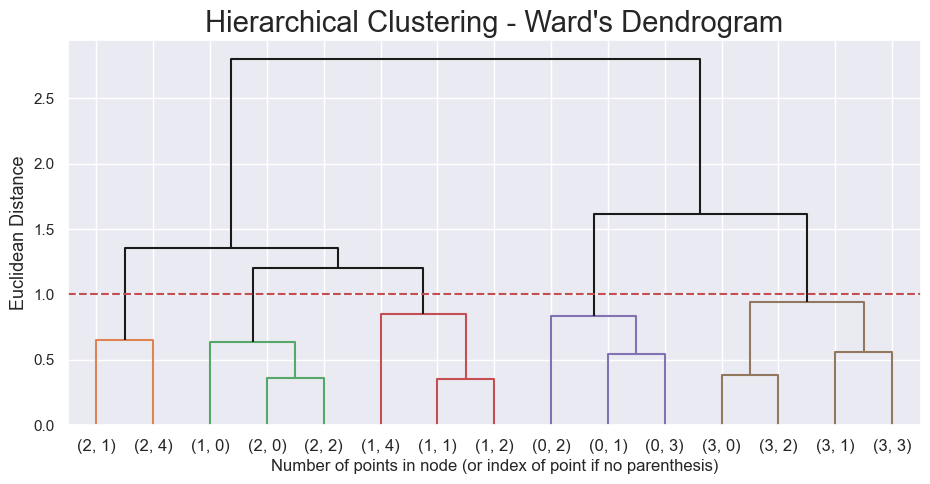

In [208]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 1
dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [209]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=5
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

AmountSpentPerMonth  sqr_Att_Cla_We  \
demographic_labels preference_labels                                        
0                  1                             0.097290        0.291835   
                   2                             0.097395        0.311175   
                   3                             0.140300        0.534895   
1                  0                             0.083016        0.007438   
                   1                             0.140573        0.018208   
                   2                             0.117567        0.005103   
                   4                             0.139010        0.024561   
2                  0                             0.064865        0.031422   
                   1                             0.067479        0.023394   
                   2                             0.068911        0.023552   
                   4                             0.093655        0.029492   
3                  0                             0.126630        0.352009   
                   1                             0.145440        0.260510   
                   2                             0.127498        0.298725   
                   3                             0.169682        0.568714   

                                      sqr_Enr_Dur  RealNumberOfVisits  \
demographic_labels preference_labels                                    
0                  1                     0.803010            0.060403   
                   2                     0.705019            0.034620   
                   3                     0.766886            0.113427   
1                  0                     0.277694            0.083212   
                   1                     0.218155            0.085918   
                   2                     0.217370            0.070728   
                   4                     0.273103            0.397316   
2                  0                     0.508802            0.074012   
                   1                     0.677934            0.077941   
                   2                     0.567382            0.066668   
                   4                     0.724571            0.350178   
3                  0                     0.331484            0.043304   
                   1                     0.326326            0.053213   
                   2                     0.337730            0.026451   
                   3                     0.332889            0.116886   

                                      EnrollmentDuration  sqr_Rat_All_Act_Vis  \
demographic_labels preference_labels                                            
0                  1                            0.675576             0.414456   
                   2                            0.535655             0.244809   
                   3                            0.626235             0.494471   
1                  0                            0.111463             0.284394   
                   1                            0.082731             0.316215   
                   2                            0.080390             0.261704   
                   4                            0.111994             0.642587   
2                  0                            0.313006             0.236095   
                   1                            0.509878             0.283986   
                   2                            0.371977             0.238704   
                   4                            0.571249             0.589356   
3                  0                            0.147544             0.282978   
                   1                            0.155847             0.388542   
                   2                            0.160015             0.207781   
                   3                            0.162058             0.563020   

                                      DaysWithoutFrequency  NumActivities  \
demographic_labels preference_l

In [210]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

# df_ = df_pca.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['demographic_labels'], row['preference_labels'])
    ], axis=1
)

# Merged cluster centroids
metric_features_and_label = metric_features + ['merged_labels']
df_[metric_features_and_label].groupby('merged_labels').mean()

AmountSpentPerMonth  sqr_Att_Cla_We  sqr_Enr_Dur  \
merged_labels                                                     
0                         0.140897        0.372865     0.332100   
1                         0.129382        0.012388     0.221983   
2                         0.118025        0.413473     0.762302   
3                         0.075045        0.025157     0.691414   
4                         0.078300        0.013142     0.360753   

               RealNumberOfVisits  EnrollmentDuration  sqr_Rat_All_Act_Vis  \
merged_labels                                                                
0                        0.059128            0.155391             0.354843   
1                        0.102439            0.083844             0.314960   
2                        0.079801            0.618528             0.412623   
3                        0.156627            0.527616             0.372249   
4                        0.078858            0.185545             0.270140   

               DaysWithoutFrequency  NumActivities  \
merged_labels                                        
0                          0.042233       0.017520   
1                          0.023463       0.022543   
2                          0.058860       0.057504   
3                          0.025530       0.085271   
4                          0.076772       0.026848   

               AllowedNumberOfVisitsBySLA  AllowedWeeklyVisitsBySLA  \
merged_labels                                                         
0                                0.182604                  0.227070   
1                                0.475118                  0.998763   
2                                0.201370                  0.270616   
3                                0.494348                  0.997674   
4                                0.495817                  0.998812   

               AttendedClassesWeek  sqr_Amo_Spe_Mo  NumberOfRenewals  \
merged_labels                                                          
0                         0.174678        0.349877          0.148174   
1                         0.003789        0.332589          0.044272   
2                         0.197329        0.320701          0.621959   
3                         0.006094        0.243943          0.522813   
4                         0.004962        0.250228          0.189808   

               RatioAllowedActualVisits       Age  FrequenciesPerWeek  \
merged_labels                                                           
0                              0.203565  0.220661            0.102448   
1                              0.136671  0.328618            0.184335   
2                              0.241739  0.190434            0.108298   
3                              0.181179  0.393111            0.164469   
4                              0.109155  0.311963            0.125384   

               AmountSpentPerRenewal  RatioIncomeExpenses  sqr_Freq_Wee  \
merged_labels                                                             
0                           0.220171             0.049691      0.279068   
1                           0.125088             0.100080      0.379624   
2                           0.280132             0.026317      0.290864   
3                           0.177876             0.047177      0.349592   
4                           0.120626             0.060715      0.302815   

                 Income  sqr_Rat_Inc_Exp  sqr_Att_Cla  sqr_Amo_Spe_Ren  \
merged_labels                                                            
0              0.139715         0.144500     0.199121         0.428027   
1              0.249307         0.299084     0.005029         0.310592   
2              0.100159         0.084464     0.450622         0.500208   
3              0.298317         0.202694     0.027262         0.380433   
4              0.237106         0.231054     0.009196         0.305392   

               LifetimeValue  sqr_Day_No_Frq  NumberOfFrequ

In [211]:
df_.head()

Age  Gender  Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
0  0.689655  Female   0.550              0.000573       0.029974          0   
1  0.333333  Female   0.263              0.034384       0.162689          0   
2  0.264368    Male   0.198              0.004011       0.012357          0   
3  0.103448    Male   0.000              0.012607       0.052460          0   
4  0.402299    Male   0.432              0.120344       0.126604          0   

   AthleticsActivities  WaterActivities  FitnessActivities  TeamActivities  \
0                  0.0              0.0                1.0             0.0   
1                  0.0              0.0                0.0             0.0   
2                  0.0              0.0                1.0             0.0   
3                  0.0              0.0                0.0             1.0   
4                  0.0              0.0                1.0             0.0   

   RacketActivities  CombatActivities  SpecialActivities  OtherActivities  \
0               0.0               0.0                0.0              0.0   
1               0.0               0.0                1.0              0.0   
2               0.0               0.0                0.0              0.0   
3               0.0               0.0                0.0              0.0   
4               0.0               0.0                0.0              0.0   

   NumberOfFrequencies  AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
0             0.008969                  0.166667                    0.049300   
1             0.024664                  0.166667                    0.162305   
2             0.005605                  1.000000                    0.290221   
3             0.021300                  0.166667                    0.165348   
4             0.044843                  1.000000                    0.604078   

   RealNumberOfVisits  NumberOfRenewals  NumberOfReferences  Dropout  \
0            0.034483          0.000000                   0        0   
1            0.017241          0.333333                   0        1   
2            0.103448          0.000000                   0        1   
3            0.051724          0.000000                   0        1   
4            0.000000          0.500000                   0        1   

   EnrollmentDuration  num_periods  period_type  DaysSinceLastVisit  \
0            0.025394          0.0            1            0.000514   
1            0.198070          0.5            2            0.805755   
2            0.011173          0.0            0            0.456835   
3            0.077197          0.5            2            0.145427   
4            0.391061          0.0            0            0.370504   

   AgeCategory  IncomeCat  AmountSpentPerMonth  RatioIncomeExpenses  \
0       Senior  Very_High             0.198825             0.060239   
1  Young Adult   Moderate             0.155267             0.098459   
2  Young Adult   Moderate             0.161650             0.136138   
3        Child  No_Income             0.125136             0.000000   
4        Adult       High             0.061506             0.023881   

   NumActivities  AmountSpentPerRenewal  FrequenciesPerWeek  \
0            0.0               0.082210            0.216674   
1            0.0               0.222336            0.080239   
2            0.0               0.033947            0.279478   
3            0.0               0.143810            0.174402   
4            0.0               0.114899            0.073108   

   AttendedClassesWeek AttendedClassesWeekCat  RatioAllowedActualVisits  \
0             0.356034                    0-1                  0.318542   
1             0.007412                    0-1                  0.057418   
2             0.000000                      0                  0.199845   
3             0.036875                    0-1                  0.169338   
4             0.000000                      0                  0.000000   

   

In [212]:
# Merge cluster contigency table
# Getting size of each final cluster
df_hcounts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels
df_hcounts = df_hcounts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_hcounts['demographic_labels'] = df_hcounts['merged_labels'].apply(lambda x: x[0])
df_hcounts['preference_labels'] = df_hcounts['merged_labels'].apply(lambda x: x[1])

df_hcounts.pivot(values=0, index='demographic_labels', columns='preference_labels')

preference_labels        2       3       4
demographic_labels                        
0                      NaN  1055.0     NaN
1                      NaN     NaN  4717.0
2                   4631.0     NaN  1505.0
3                      NaN  2911.0     NaN

In [213]:
# Setting df to have the final product, behavior and merged clusters
df_final = df_.copy()

In [214]:
df_final

Age  Gender    Income  DaysWithoutFrequency  LifetimeValue  \
0      0.689655  Female  0.550000              0.000573       0.029974   
1      0.333333  Female  0.263000              0.034384       0.162689   
2      0.264368    Male  0.198000              0.004011       0.012357   
3      0.103448    Male  0.000000              0.012607       0.052460   
4      0.402299    Male  0.432000              0.120344       0.126604   
...         ...     ...       ...                   ...            ...   
14814  0.160920    Male  0.000000              0.001146       0.496732   
14815  0.448276    Male  0.350859              0.021777       0.116613   
14816  0.229885    Male  0.181000              0.001146       0.014400   
14817  0.632184    Male  0.480000              0.001719       0.268017   
14818  0.367816  Female  0.370000              0.008023       0.312613   

       UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  \
0              0                  0.0              0.0                1.0   
1              0                  0.0              0.0                0.0   
2              0                  0.0              0.0                1.0   
3              0                  0.0              0.0                0.0   
4              0                  0.0              0.0                1.0   
...          ...                  ...              ...                ...   
14814          0                  0.0              1.0                0.0   
14815          0                  0.0              0.0                0.0   
14816          0                  0.0              0.0                1.0   
14817          0                  0.0              1.0                0.0   
14818          0                  0.0              0.0                1.0   

       TeamActivities  RacketActivities  CombatActivities  SpecialActivities  \
0                 0.0               0.0               0.0                0.0   
1                 0.0               0.0               0.0                1.0   
2                 0.0               0.0               0.0                0.0   
3                 1.0               0.0               0.0                0.0   
4                 0.0               0.0               0.0                0.0   
...               ...               ...               ...                ...   
14814             0.0               0.0               0.0                0.0   
14815             0.0               0.0               1.0                0.0   
14816             0.0               0.0               0.0                0.0   
14817             0.0               0.0               0.0                0.0   
14818             0.0               0.0               0.0                0.0   

       OtherActivities  NumberOfFrequencies  AllowedWeeklyVisitsBySLA  \
0                  0.0             0.008969                  0.166667   
1                  0.0             0.024664                  0.166667   
2                  0.0             0.005605                  1.000000   
3                  0.0             0.021300                  0.166667   
4                  0.0             0.044843                  1.000000   
...                ...                  ...                       ...   
14814              0.0             0.124439                  0.500000   
14815              0.0             0.062780                  1.000000   
14816              0.0             0.005605                  1.000000   
14817              0.0             0.206278                  0.333333   
14818              0.0             0.188341                  1.000000   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
0                        0.049300            0.034483          0.000000   
1                        0.162305            0.017241          0.333333   
2                        0.290221            0.103448          0.000000   
3                        0.165348            0.051724       

<h1>7. Cluster Analysis  </h1>

In [239]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-60)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [240]:
df_final.columns

Index(['Age', 'Gender', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
       'UseByTime', 'AthleticsActivities', 'WaterActivities',
       'FitnessActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'SpecialActivities', 'OtherActivities',
       'NumberOfFrequencies', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'NumberOfReferences', 'Dropout', 'EnrollmentDuration', 'num_periods',
       'period_type', 'DaysSinceLastVisit', 'AgeCategory', 'IncomeCat',
       'AmountSpentPerMonth', 'RatioIncomeExpenses', 'NumActivities',
       'AmountSpentPerRenewal', 'FrequenciesPerWeek', 'AttendedClassesWeek',
       'AttendedClassesWeekCat', 'RatioAllowedActualVisits', 'sqr_Att_Cla',
       'sqr_Amo_Spe_Mo', 'sqr_Rat_Inc_Exp', 'sqr_Amo_Spe_Ren', 'sqr_Freq_Wee',
       'sqr_Rat_All_Act_Vis', 'sqr_Att_Cla_We', 'sqr_Enr_Dur',
       'sqr_Day_No_Frq', 'preference_labels', 'demographic_labels',
       'mer

C:\Users\Jannik\AppData\Local\Temp\ipykernel_30696\2797602494.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(cluster_labels)
C:\Users\Jannik\AppData\Local\Temp\ipykernel_30696\2797602494.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(cluster_labels)
C:\Users\Jannik\AppData\Local\Temp\ipykernel_30696\2797602494.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(cluster_labels)


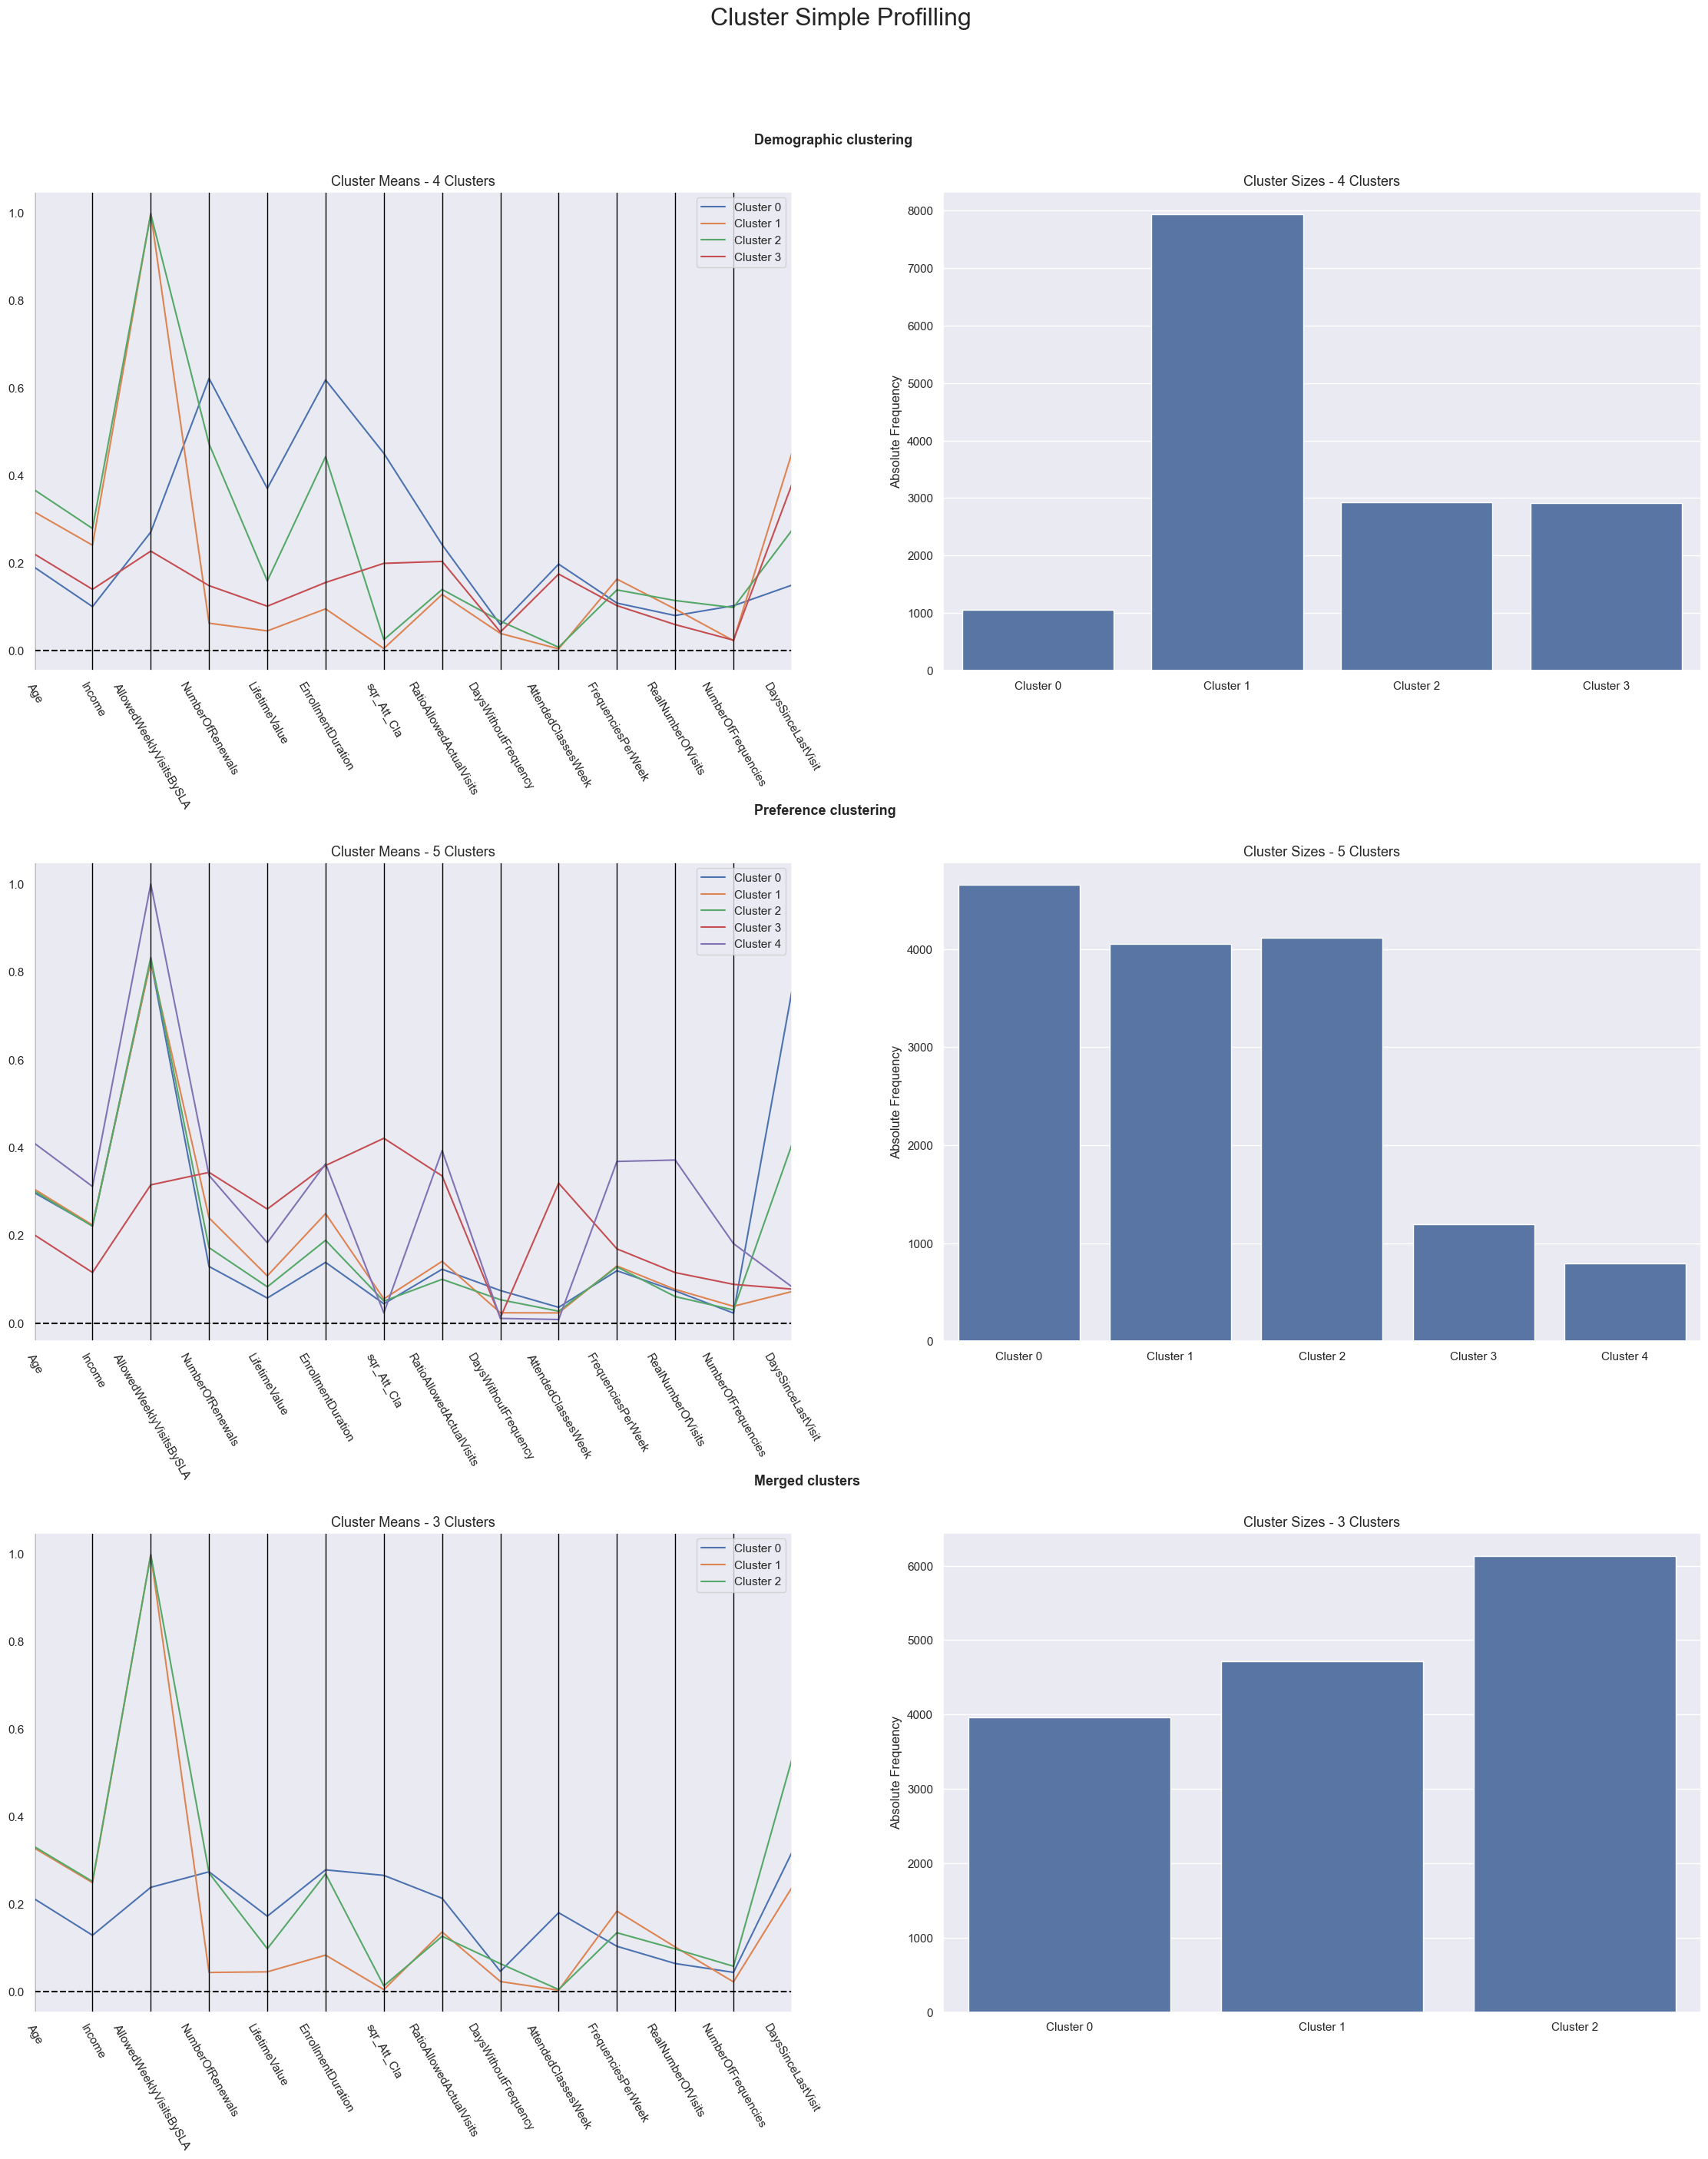

In [262]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df_final[metric_features_profiling + ['demographic_labels', 'preference_labels', 'merged_labels']], 
    label_columns = ['demographic_labels', 'preference_labels', 'merged_labels'], 
    figsize = (28, 30), 
    compar_titles = ["Demographic clustering", "Preference clustering", "Merged clusters"]
)

### Profiling with categorical features

In [242]:
non_metric_features

['Gender',
 'UseByTime',
 'AthleticsActivities',
 'WaterActivities',
 'FitnessActivities',
 'TeamActivities',
 'RacketActivities',
 'CombatActivities',
 'SpecialActivities',
 'OtherActivities',
 'Dropout',
 'period_type',
 'AgeCategory',
 'NumberOfReferences',
 'IncomeCat',
 'AttendedClassesWeekCat']

### One Hot Encoding

In [243]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Apply one-hot encoding to categorical data
df_cat = df_final[non_metric_features]

df_cat_OHE = pd.DataFrame(encoder.fit_transform(df_cat).toarray(),
                                  index=df_cat.index,
                                  columns=encoder.get_feature_names_out(df_cat.columns))


In [244]:
df_cat_OHE.columns

Index(['Gender_Female', 'Gender_Male', 'UseByTime_0', 'UseByTime_1',
       'AthleticsActivities_0.0', 'AthleticsActivities_1.0',
       'WaterActivities_0.0', 'WaterActivities_1.0', 'FitnessActivities_0.0',
       'FitnessActivities_1.0', 'TeamActivities_0.0', 'TeamActivities_1.0',
       'RacketActivities_0.0', 'RacketActivities_1.0', 'CombatActivities_0.0',
       'CombatActivities_1.0', 'SpecialActivities_0.0',
       'SpecialActivities_1.0', 'OtherActivities_0.0', 'OtherActivities_1.0',
       'Dropout_0', 'Dropout_1', 'period_type_0', 'period_type_1',
       'period_type_2', 'AgeCategory_Adult', 'AgeCategory_Child',
       'AgeCategory_Senior', 'AgeCategory_Teenager', 'AgeCategory_Toddler',
       'AgeCategory_Young Adult', 'NumberOfReferences_0',
       'NumberOfReferences_1', 'IncomeCat_High', 'IncomeCat_Low',
       'IncomeCat_Moderate', 'IncomeCat_No_Income', 'IncomeCat_Very_High',
       'IncomeCat_Very_Low', 'AttendedClassesWeekCat_0',
       'AttendedClassesWeekCat_0-1', '

In [245]:
df_final_OHE = pd.concat([df_final[metric_features + ['demographic_labels', 'preference_labels', 'merged_labels']], df_cat_OHE], axis=1)

In [246]:
df_final_OHE.head()

AmountSpentPerMonth  sqr_Att_Cla_We  sqr_Enr_Dur  RealNumberOfVisits  \
0             0.198825        0.596686     0.114984            0.034483   
1             0.155267        0.086093     0.411228            0.017241   
2             0.161650        0.000000     0.063619            0.103448   
3             0.125136        0.192029     0.235875            0.051724   
4             0.061506        0.000000     0.601998            0.000000   

   EnrollmentDuration  sqr_Rat_All_Act_Vis  DaysWithoutFrequency  \
0            0.025394             0.564395              0.000573   
1            0.198070             0.239621              0.034384   
2            0.011173             0.447040              0.004011   
3            0.077197             0.411507              0.012607   
4            0.391061             0.000000              0.120344   

   NumActivities  AllowedNumberOfVisitsBySLA  AllowedWeeklyVisitsBySLA  \
0            0.0                    0.049300                  0.166667   
1            0.0                    0.162305                  0.166667   
2            0.0                    0.290221                  1.000000   
3            0.0                    0.165348                  0.166667   
4            0.0                    0.604078                  1.000000   

   AttendedClassesWeek  sqr_Amo_Spe_Mo  NumberOfRenewals  \
0             0.356034        0.432676          0.000000   
1             0.007412        0.379634          0.333333   
2             0.000000        0.387834          0.000000   
3             0.036875        0.338439          0.000000   
4             0.000000        0.230464          0.500000   

   RatioAllowedActualVisits       Age  FrequenciesPerWeek  \
0                  0.318542  0.689655            0.216674   
1                  0.057418  0.333333            0.080239   
2                  0.199845  0.264368            0.279478   
3                  0.169338  0.103448            0.174402   
4                  0.000000  0.402299            0.073108   

   AmountSpentPerRenewal  RatioIncomeExpenses  sqr_Freq_Wee  Income  \
0               0.082210             0.060239      0.451330   0.550   
1               0.222336             0.098459      0.264653   0.263   
2               0.033947             0.136138      0.516132   0.198   
3               0.143810             0.000000      0.402247   0.000   
4               0.114899             0.023881      0.251484   0.432   

   sqr_Rat_Inc_Exp  sqr_Att_Cla  sqr_Amo_Spe_Ren  LifetimeValue  \
0         0.245437     0.144769         0.263895       0.029974   
1         0.313782     0.054718         0.454198       0.162689   
2         0.368968     0.000000         0.159038       0.012357   
3         0.000000     0.077382         0.359052       0.052460   
4         0.154535     0.000000         0.317608       0.126604   

   sqr_Day_No_Frq  NumberOfFrequencies  num_periods  DaysSinceLastVisit  \
0        0.023939             0.008969          0.0            0.000514   
1        0.185429             0.024664          0.5            0.805755   
2        0.063336             0.005605          0.0            0.456835   
3        0.112283             0.021300          0.5            0.145427   
4        0.346906             0.044843          0.0            0.370504   

   demographic_labels  preference_labels  merged_labels  Gender_Female  \
0                   3                  3              0            1.0   
1                   3                  0              0            1.0   
2                   1                  2              1            0.0   
3                   3                  1              0            0.0   
4                   2                  2              4            0.0   

   Gender_Male  UseByTime_0  UseByTime_1  AthleticsActivities_0.0  \
0          0.0          1.0          0.0                      1.0   
1          0.0          1.0          0.0                      1.0   
2          1.0          1.0          

### Graphs

In [247]:
def profile_plot_category(df): 
    # Absolute class count in the specific cluster
    fig, ax = plt.subplots(figsize=(10,5))
    df.plot(kind='bar', stacked=False, ax=ax)
    plt.xticks(rotation=0)
    plt.title('Absolute class count in the specific cluster', fontsize=18)
    plt.legend(loc='upper left', bbox_to_anchor=(1.01, 0.9), title='Legend')    
    plt.show()

    # Relative values regarding the different class counts in the specific cluster
    fig, ax = plt.subplots(figsize=(10,5))
    df_1 = df.apply(lambda col: col/df.sum(axis=1))
    df_1.plot(kind='bar', stacked=False, ax=ax)
    plt.xticks(rotation=0)
    plt.legend(loc='upper left', bbox_to_anchor=(1.01, 0.9), title='Legend') 
    plt.title('Relative values regarding the different class counts of a specific cluster', fontsize=18)
    plt.show()

    # Realtive values regarding the specific class count in all clusters
    fig, ax = plt.subplots(figsize=(10,5))
    df_2 = df.div(df.sum(axis=0), axis=1)
    df_2.plot(kind='bar', stacked=False, ax=ax)
    plt.xticks(rotation=0)
    plt.legend(loc='upper left', bbox_to_anchor=(1.01, 0.9), title='Legend') 
    plt.title('Realtive values regarding the specific class count in all clusters', fontsize=18)
    plt.show()

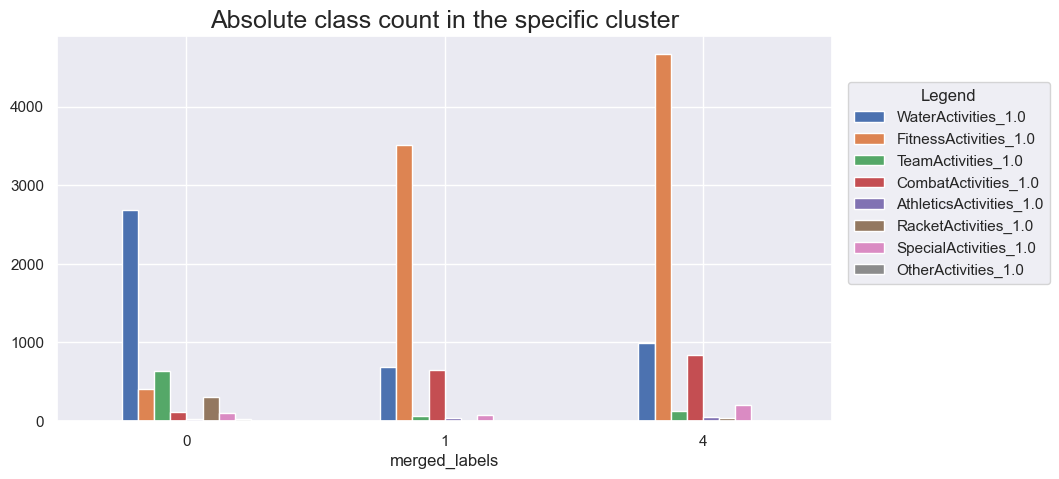

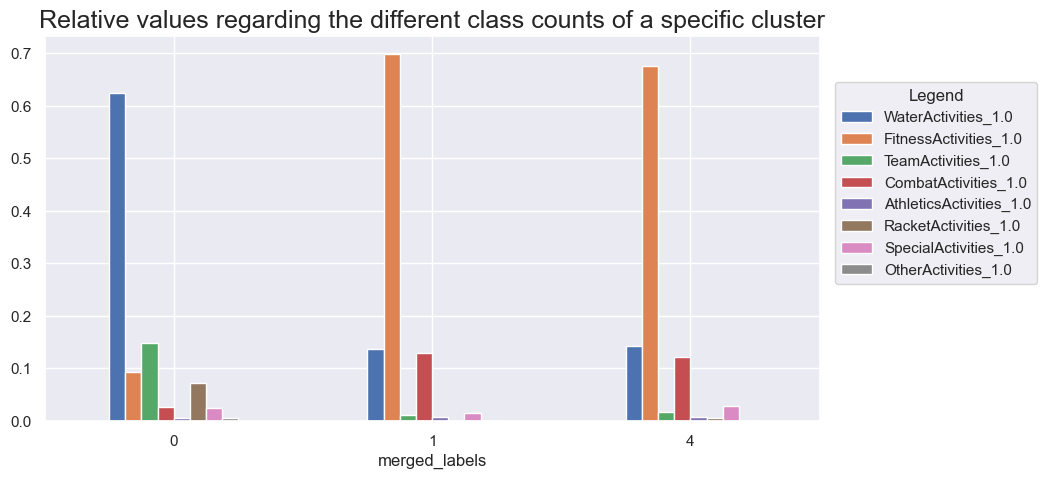

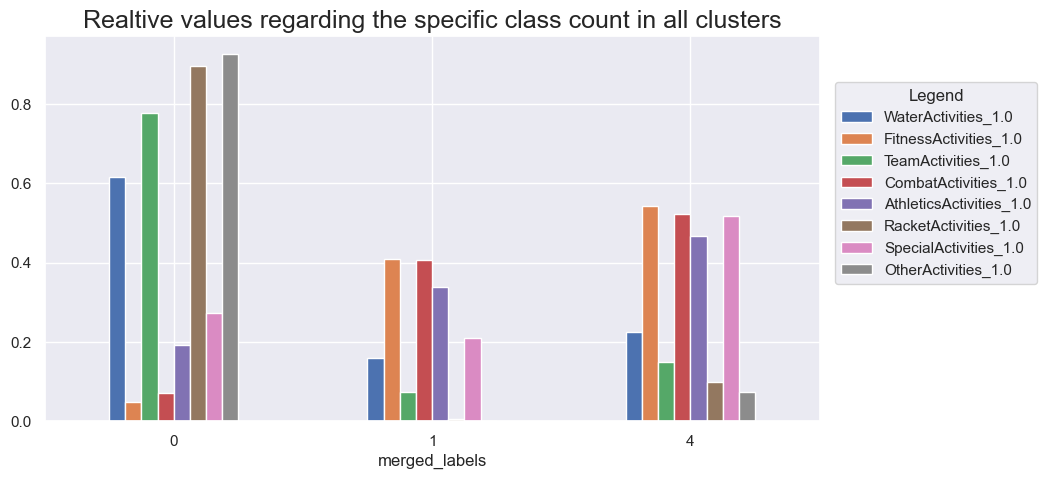

In [248]:
df_activities = df_final_OHE[['merged_labels', 'WaterActivities_1.0', 'FitnessActivities_1.0',
                            'TeamActivities_1.0', 'CombatActivities_1.0', 'AthleticsActivities_1.0',
                            'RacketActivities_1.0',  'SpecialActivities_1.0',
                            'OtherActivities_1.0']].groupby(['merged_labels']).sum()
profile_plot_category(df_activities)

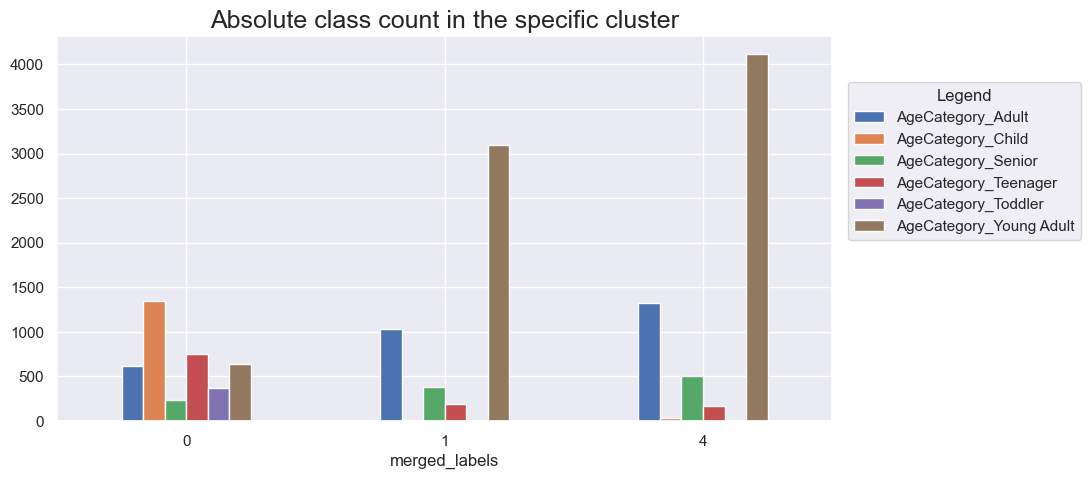

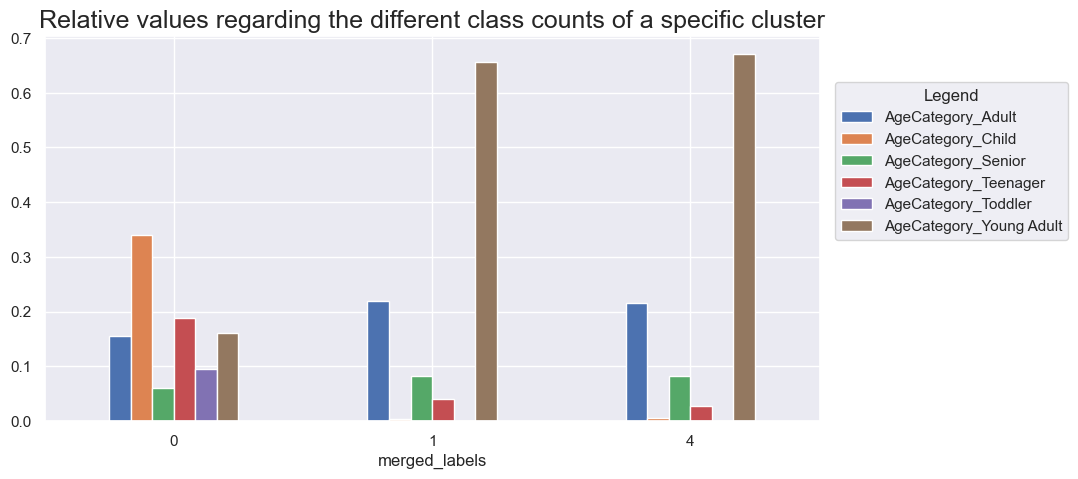

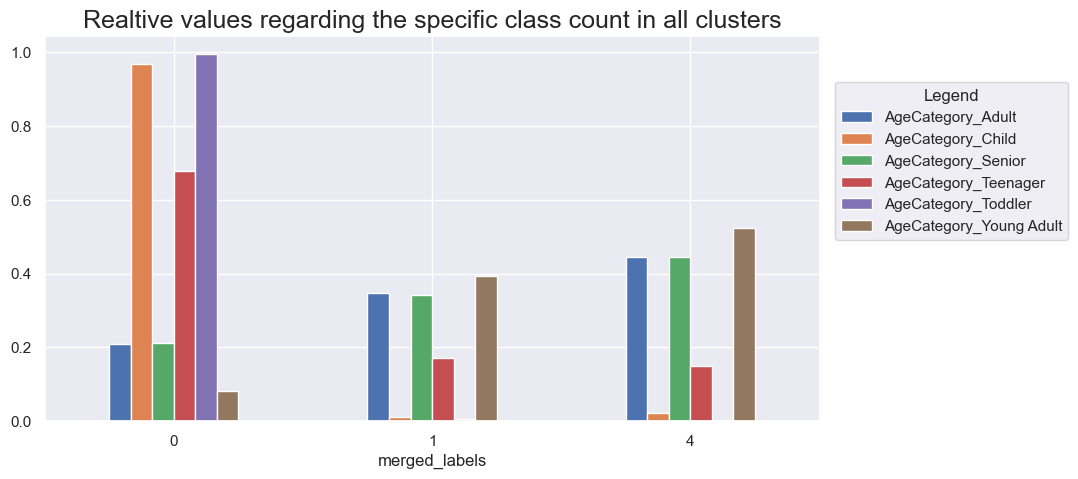

In [249]:
df_age = df_final_OHE[['merged_labels', 'AgeCategory_Adult', 'AgeCategory_Child',
                        'AgeCategory_Senior', 'AgeCategory_Teenager', 'AgeCategory_Toddler',
                        'AgeCategory_Young Adult']].groupby(['merged_labels']).sum()
profile_plot_category(df_age)

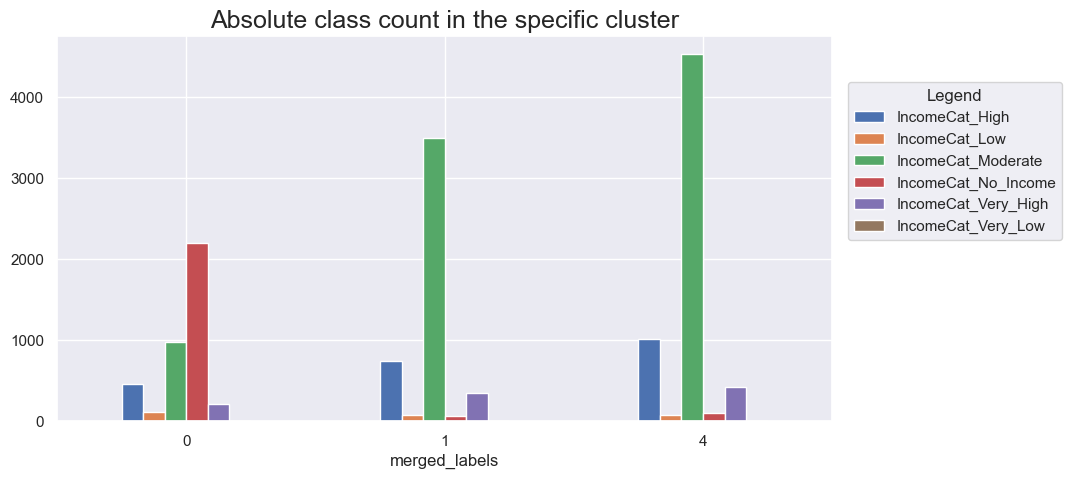

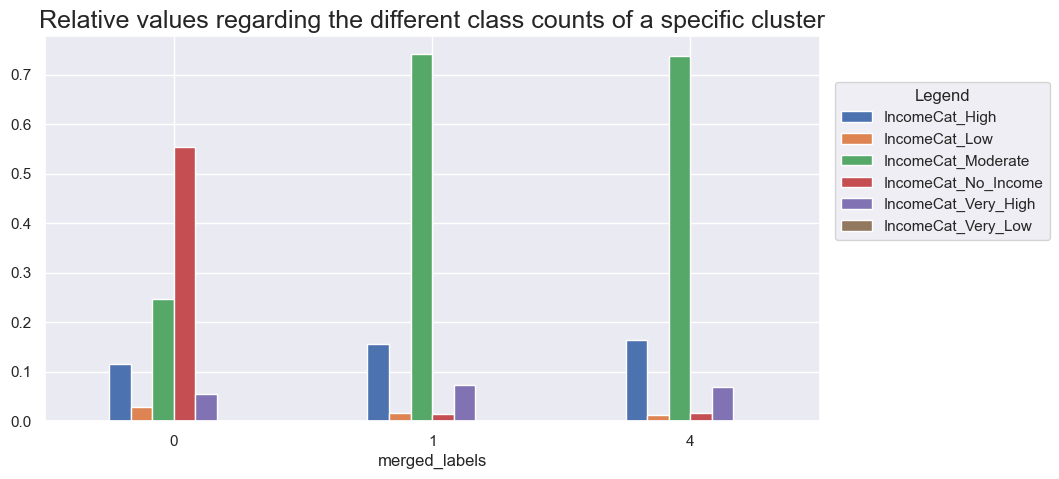

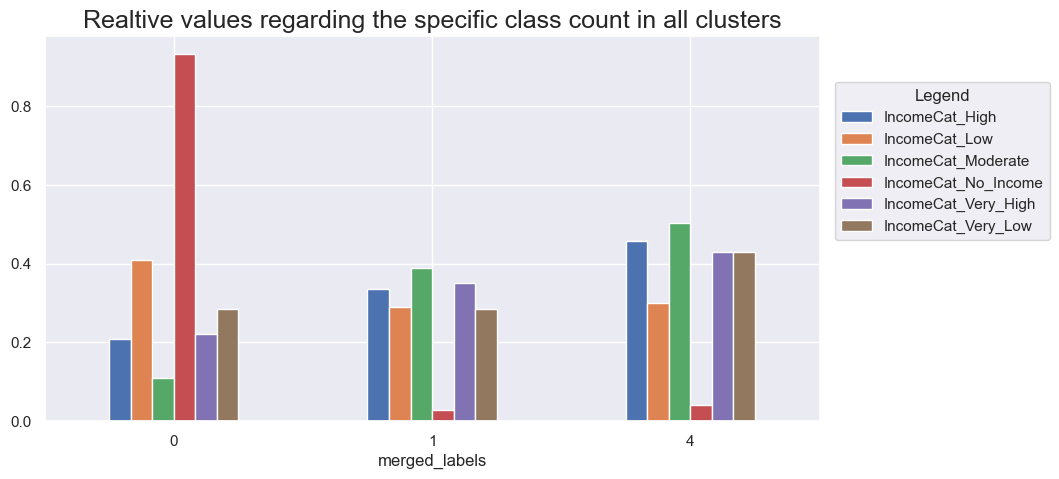

In [250]:
df_income = df_final_OHE[['merged_labels', 'IncomeCat_High', 'IncomeCat_Low',
       'IncomeCat_Moderate', 'IncomeCat_No_Income', 'IncomeCat_Very_High',
       'IncomeCat_Very_Low']].groupby(['merged_labels']).sum()
profile_plot_category(df_income)

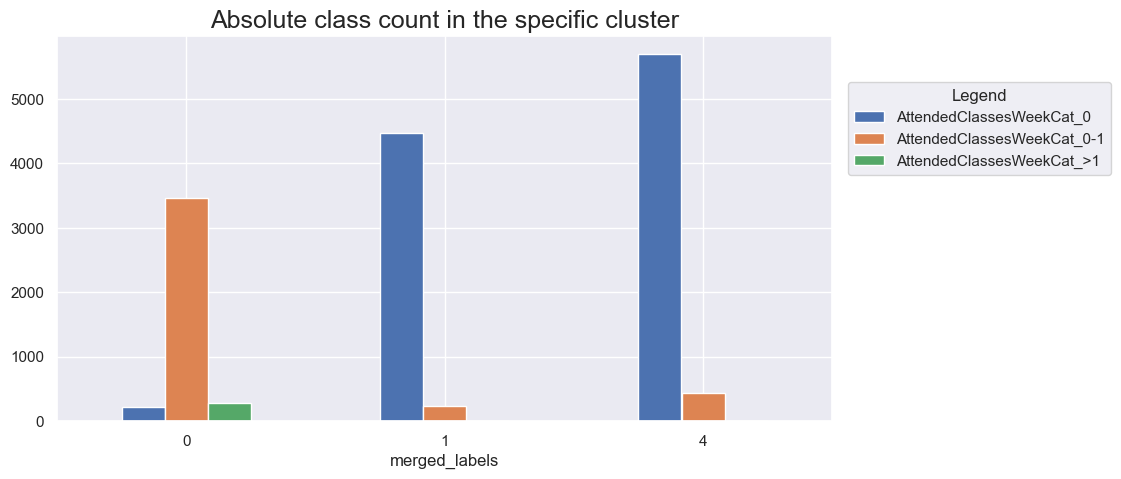

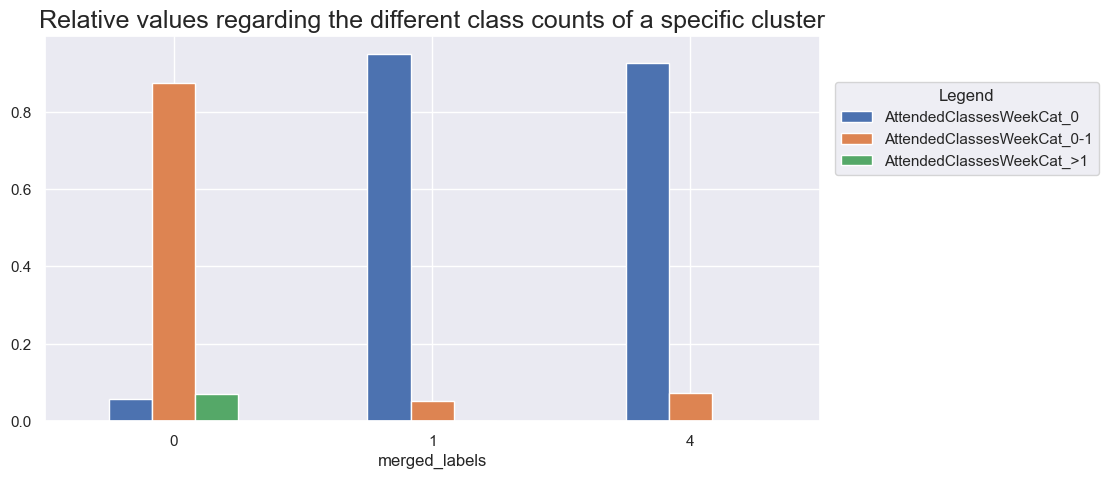

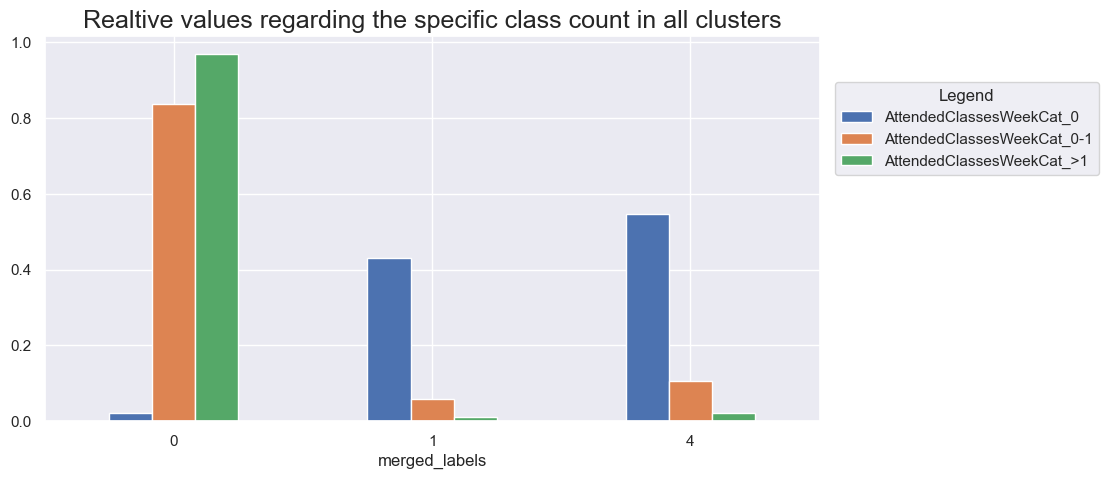

In [251]:
df_clases = df_final_OHE[['merged_labels', 'AttendedClassesWeekCat_0',
       'AttendedClassesWeekCat_0-1', 'AttendedClassesWeekCat_>1']].groupby(['merged_labels']).sum()
profile_plot_category(df_clases)

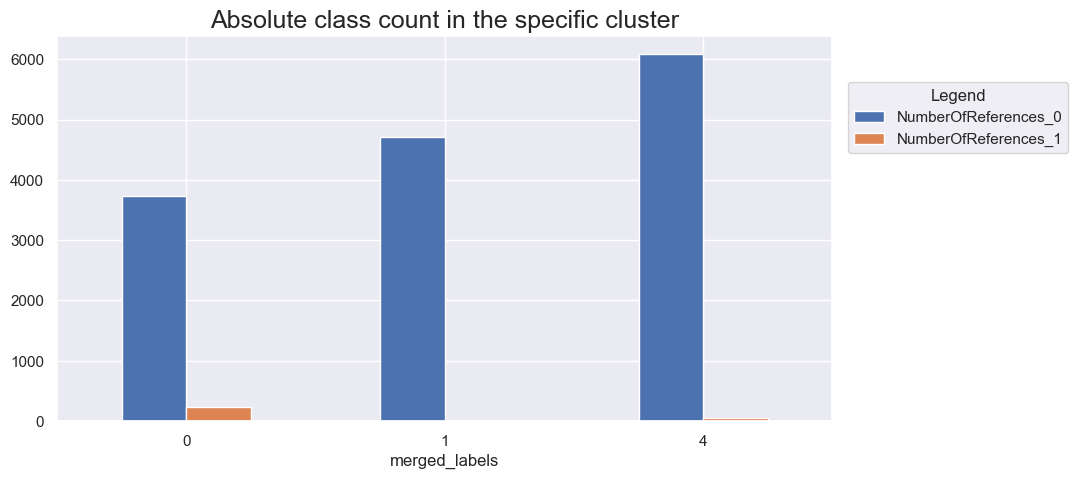

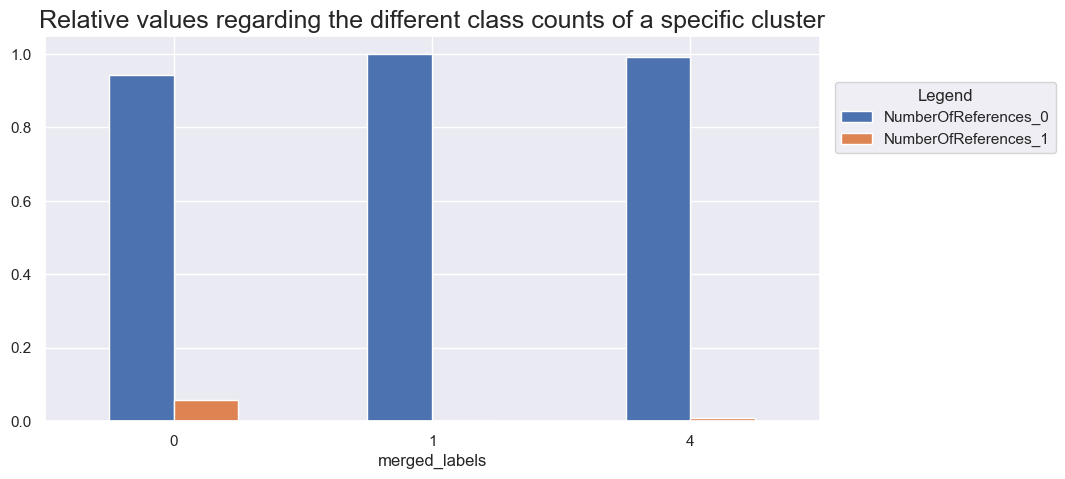

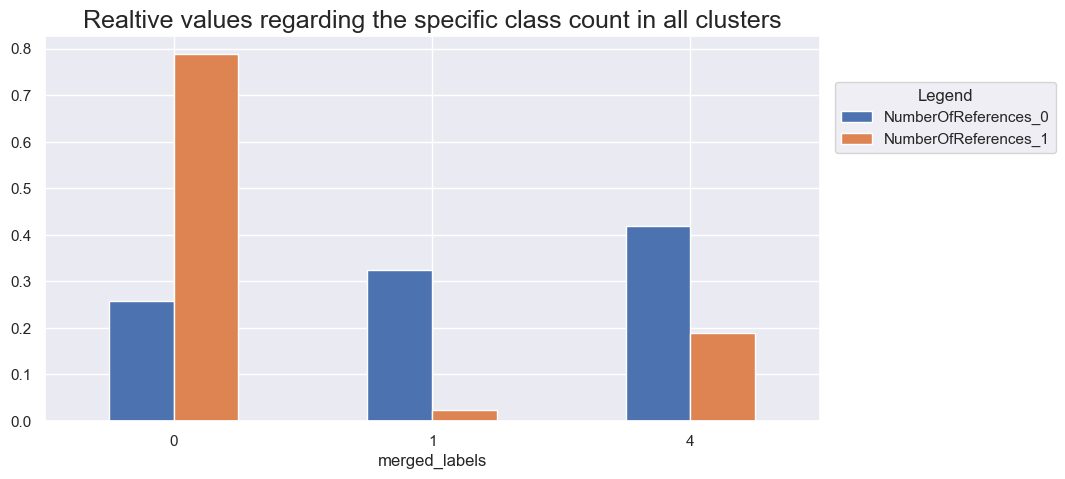

In [252]:
df_num_r = df_final_OHE[['merged_labels','NumberOfReferences_0',
       'NumberOfReferences_1']].groupby(['merged_labels']).sum()
profile_plot_category(df_num_r)

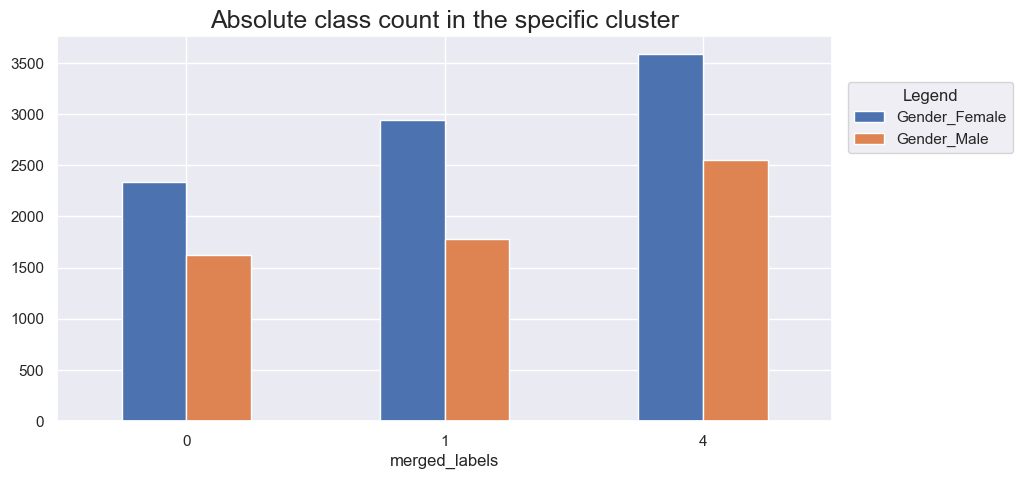

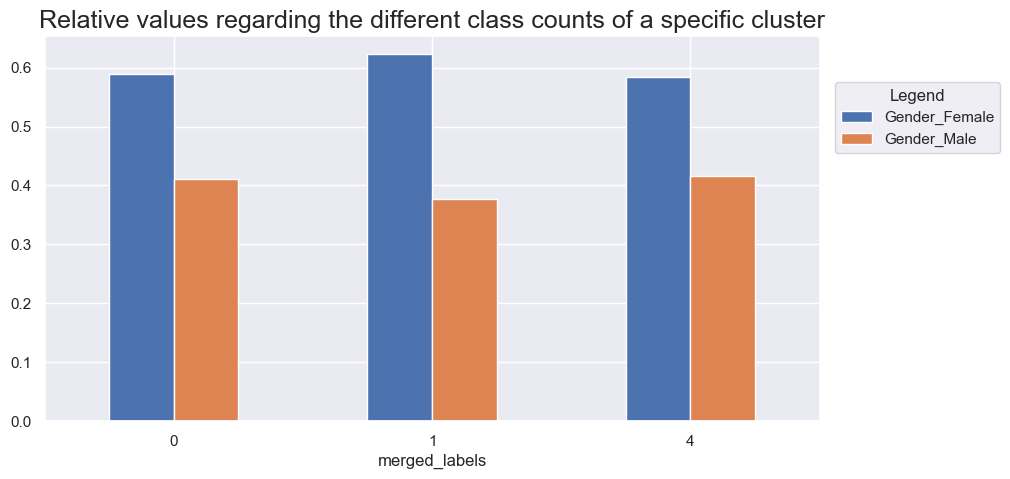

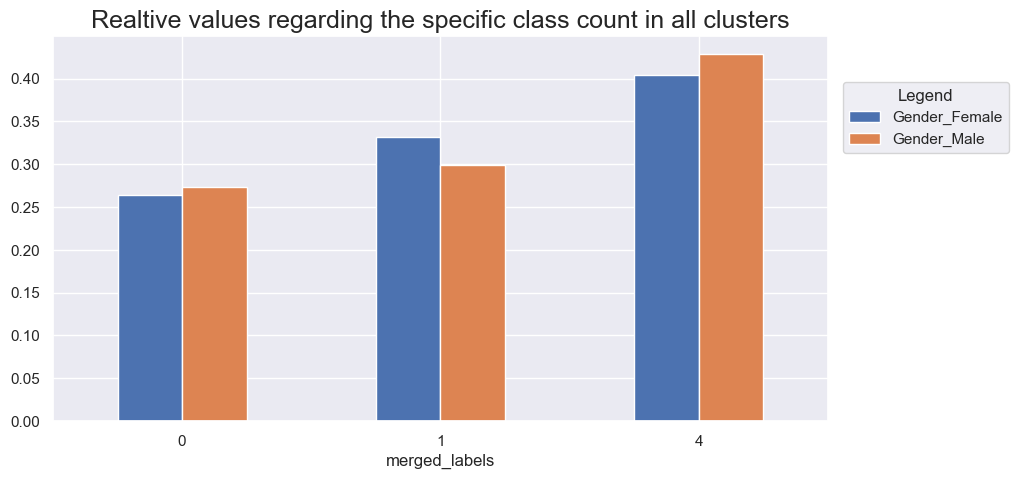

In [253]:
df_gender = df_final_OHE[['merged_labels','Gender_Female', 'Gender_Male']].groupby(['merged_labels']).sum()
profile_plot_category(df_gender)

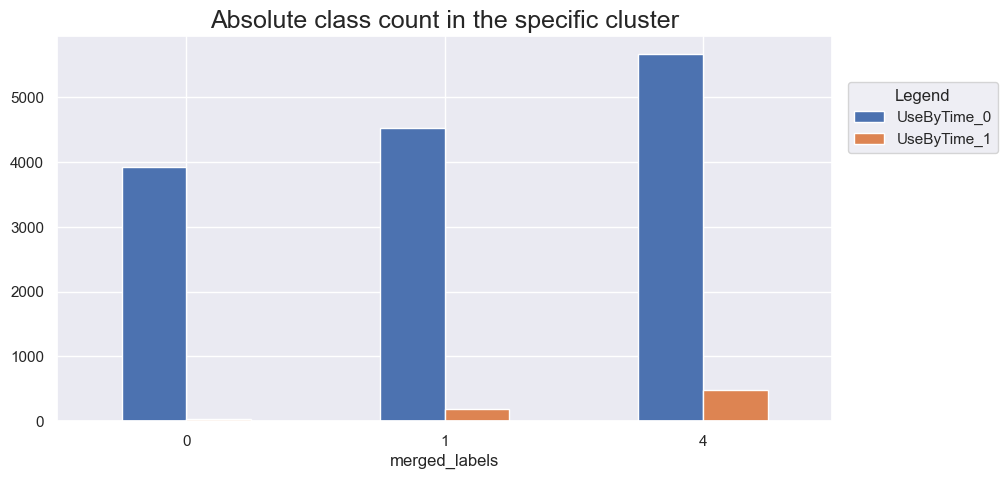

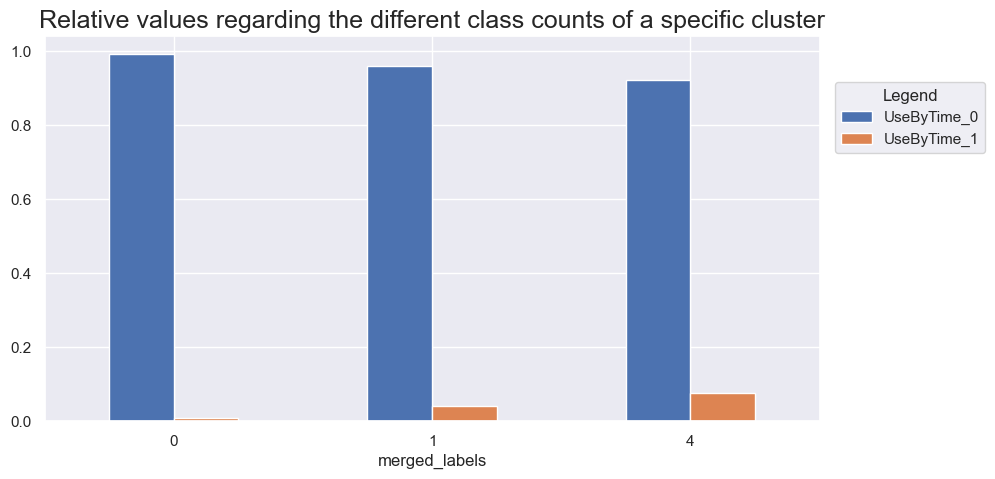

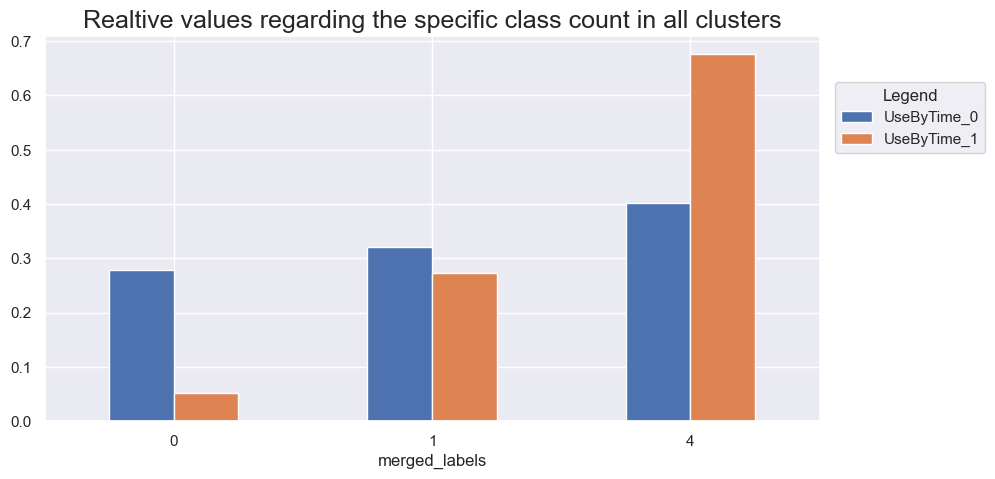

In [254]:
df_usebytime = df_final_OHE[['merged_labels','UseByTime_0', 'UseByTime_1']].groupby(['merged_labels']).sum()
profile_plot_category(df_usebytime)

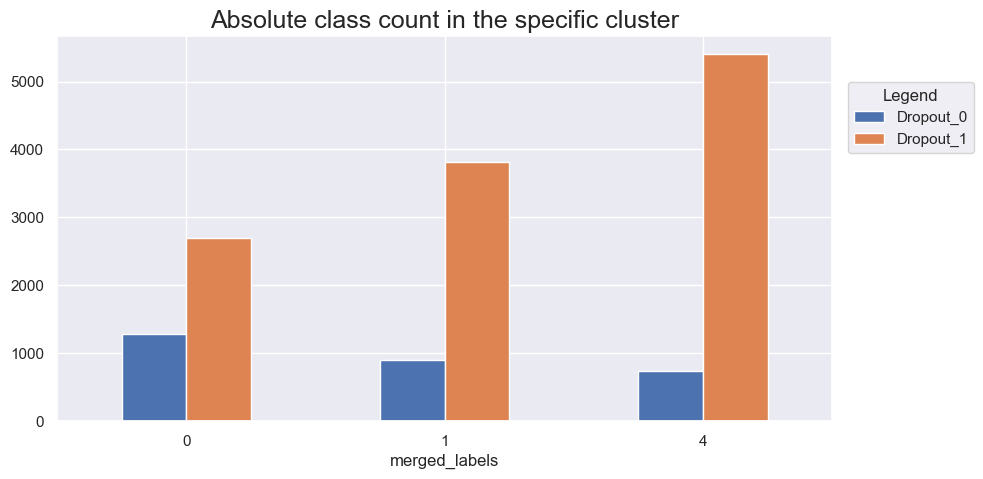

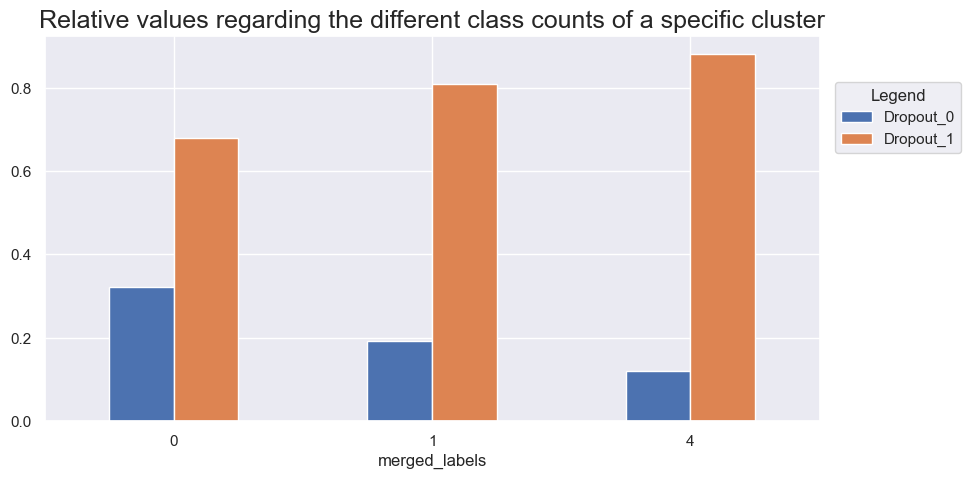

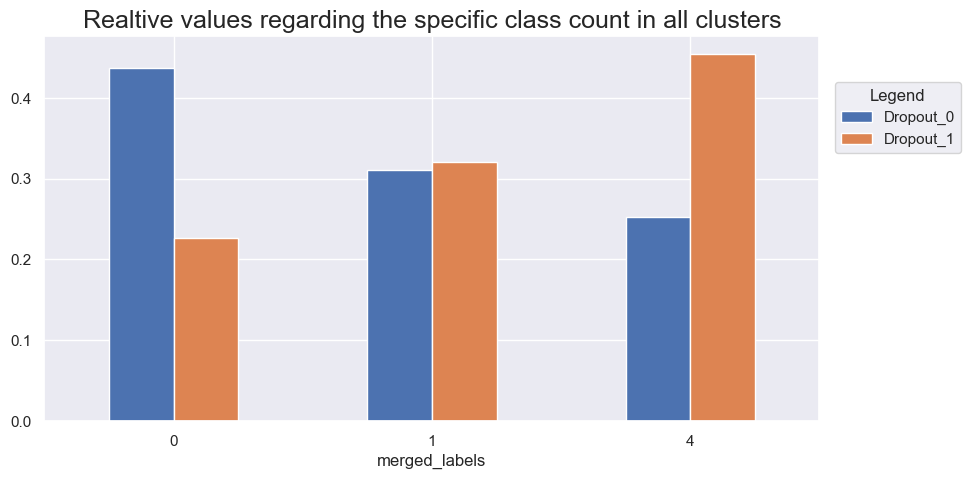

In [263]:
df_usebytime = df_final_OHE[['merged_labels','Dropout_0', 'Dropout_1']].groupby(['merged_labels']).sum()
profile_plot_category(df_usebytime)

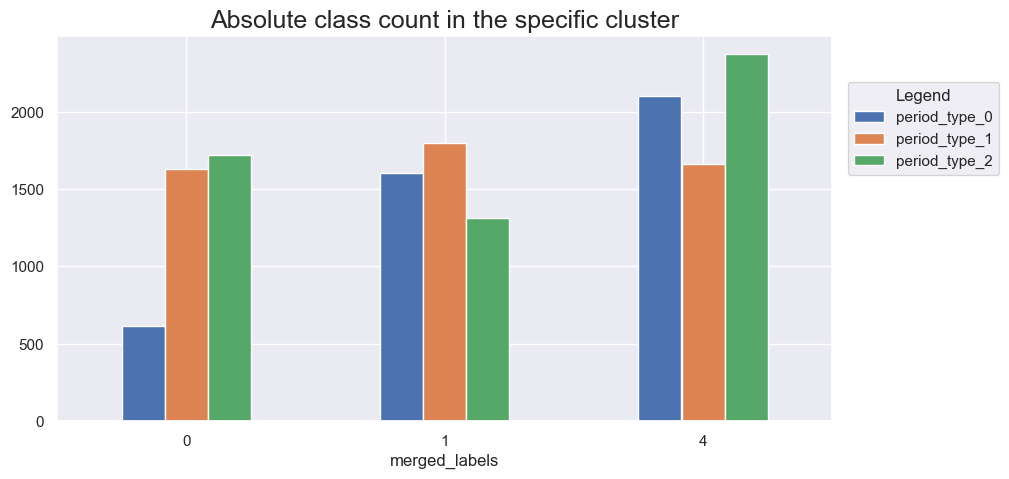

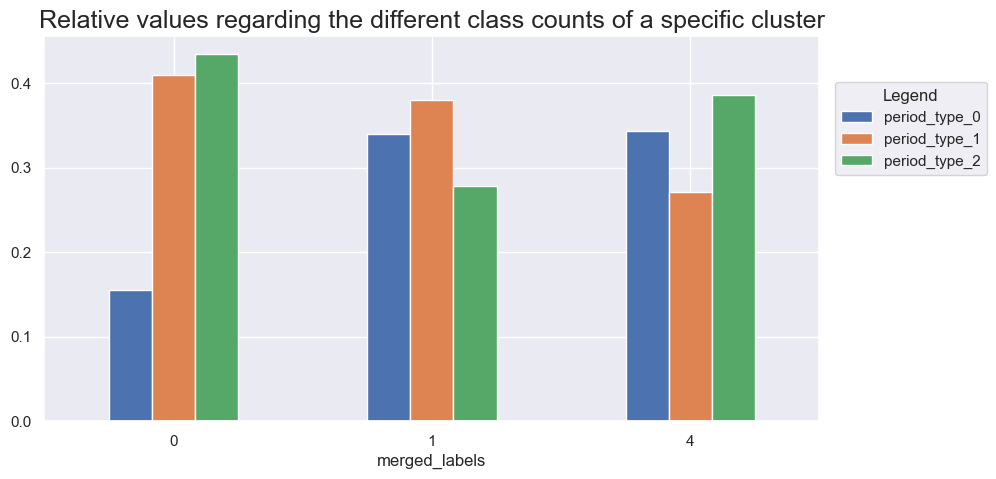

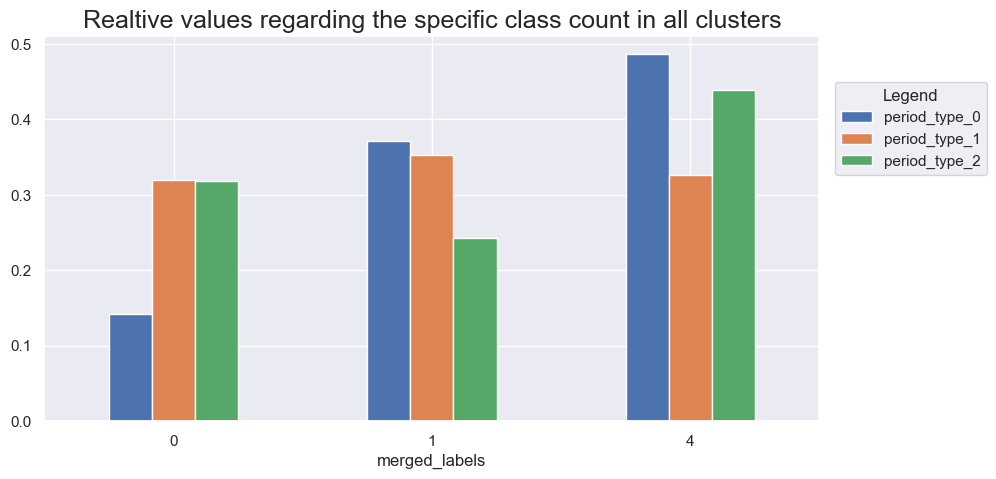

In [264]:
df_period = df_final_OHE[['merged_labels','period_type_0', 'period_type_1', 'period_type_2']].groupby(['merged_labels']).sum()
profile_plot_category(df_period)

In [255]:
df_final_OHE.columns

Index(['AmountSpentPerMonth', 'sqr_Att_Cla_We', 'sqr_Enr_Dur',
       'RealNumberOfVisits', 'EnrollmentDuration', 'sqr_Rat_All_Act_Vis',
       'DaysWithoutFrequency', 'NumActivities', 'AllowedNumberOfVisitsBySLA',
       'AllowedWeeklyVisitsBySLA', 'AttendedClassesWeek', 'sqr_Amo_Spe_Mo',
       'NumberOfRenewals', 'RatioAllowedActualVisits', 'Age',
       'FrequenciesPerWeek', 'AmountSpentPerRenewal', 'RatioIncomeExpenses',
       'sqr_Freq_Wee', 'Income', 'sqr_Rat_Inc_Exp', 'sqr_Att_Cla',
       'sqr_Amo_Spe_Ren', 'LifetimeValue', 'sqr_Day_No_Frq',
       'NumberOfFrequencies', 'num_periods', 'DaysSinceLastVisit',
       'demographic_labels', 'preference_labels', 'merged_labels',
       'Gender_Female', 'Gender_Male', 'UseByTime_0', 'UseByTime_1',
       'AthleticsActivities_0.0', 'AthleticsActivities_1.0',
       'WaterActivities_0.0', 'WaterActivities_1.0', 'FitnessActivities_0.0',
       'FitnessActivities_1.0', 'TeamActivities_0.0', 'TeamActivities_1.0',
       'RacketActivities

### Cluster visualization using t-SNE

In [256]:
metric_features

['AmountSpentPerMonth',
 'sqr_Att_Cla_We',
 'sqr_Enr_Dur',
 'RealNumberOfVisits',
 'EnrollmentDuration',
 'sqr_Rat_All_Act_Vis',
 'DaysWithoutFrequency',
 'NumActivities',
 'AllowedNumberOfVisitsBySLA',
 'AllowedWeeklyVisitsBySLA',
 'AttendedClassesWeek',
 'sqr_Amo_Spe_Mo',
 'NumberOfRenewals',
 'RatioAllowedActualVisits',
 'Age',
 'FrequenciesPerWeek',
 'AmountSpentPerRenewal',
 'RatioIncomeExpenses',
 'sqr_Freq_Wee',
 'Income',
 'sqr_Rat_Inc_Exp',
 'sqr_Att_Cla',
 'sqr_Amo_Spe_Ren',
 'LifetimeValue',
 'sqr_Day_No_Frq',
 'NumberOfFrequencies',
 'num_periods',
 'DaysSinceLastVisit']

In [257]:
good_metric_features = ['Age', 'DaysWithoutFrequency', 'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
                        'EnrollmentDuration','DaysSinceLastVisit', 'AmountSpentPerMonth', 'RatioIncomeExpenses',
                        'AmountSpentPerRenewal', 'FrequenciesPerWeek', 'AttendedClassesWeek', 'RatioAllowedActualVisits'] 

In [258]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(df_final[metric_features_profiling])

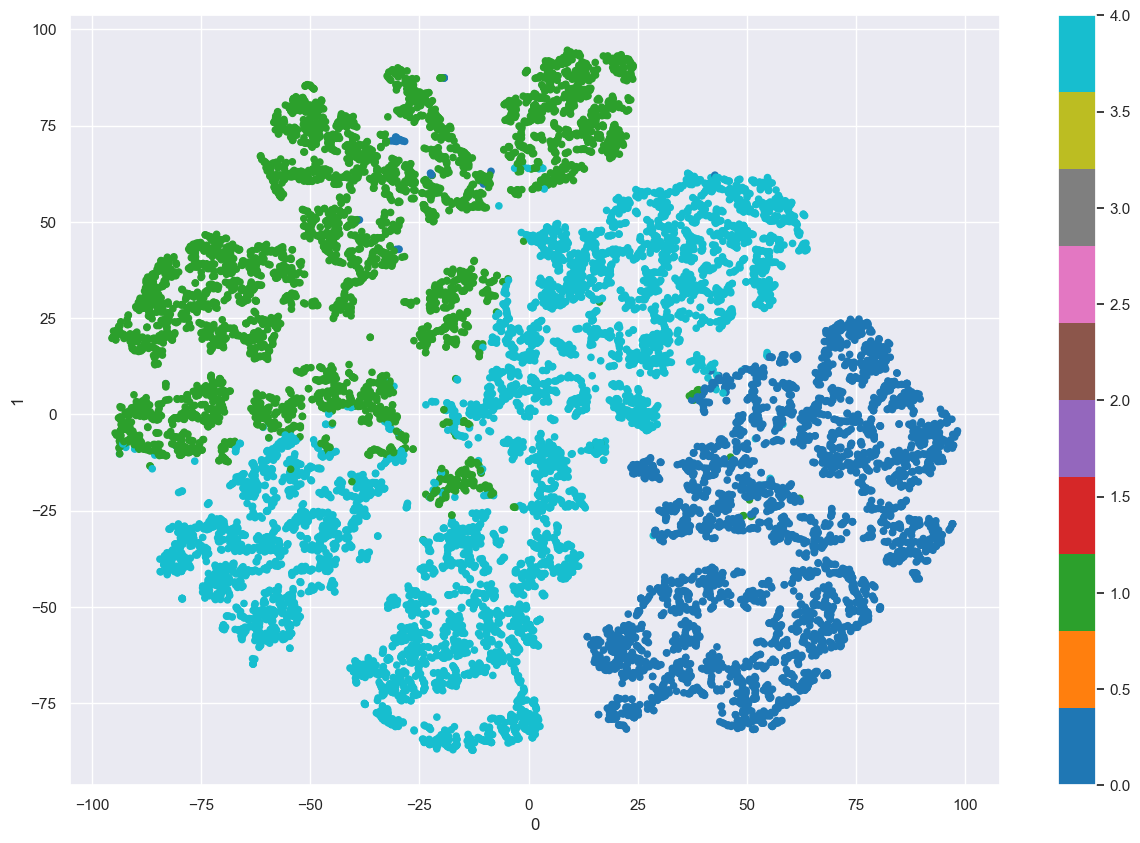

In [259]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_final['merged_labels'], colormap='tab10', figsize=(15,10))
plt.show()

## Final manual merge of similar clusters

In [236]:
df_final['merged_labels'] = df_final['merged_labels'].apply(lambda x: 0 if x == 2 else x)

In [237]:
df_final['merged_labels'] = df_final['merged_labels'].apply(lambda x: 4 if x == 3 else x)

In [260]:
df_final.merged_labels.value_counts()

merged_labels
4    6136
1    4717
0    3966
Name: count, dtype: int64

## **Now re-run whole of cluster-analysis-section is necesary to get final results of manually merged clusters!**

________________________________

___________________________